In [ ]:
import pandas as pd



Searching for pain score files...
Found 10 pain score files

Loaded 534 total pain measurements
Participants: 9
Sessions: 10
Date range: 2000-01-01 12:30:00 to 2000-01-11 15:33:00

Plotting 9 participants...


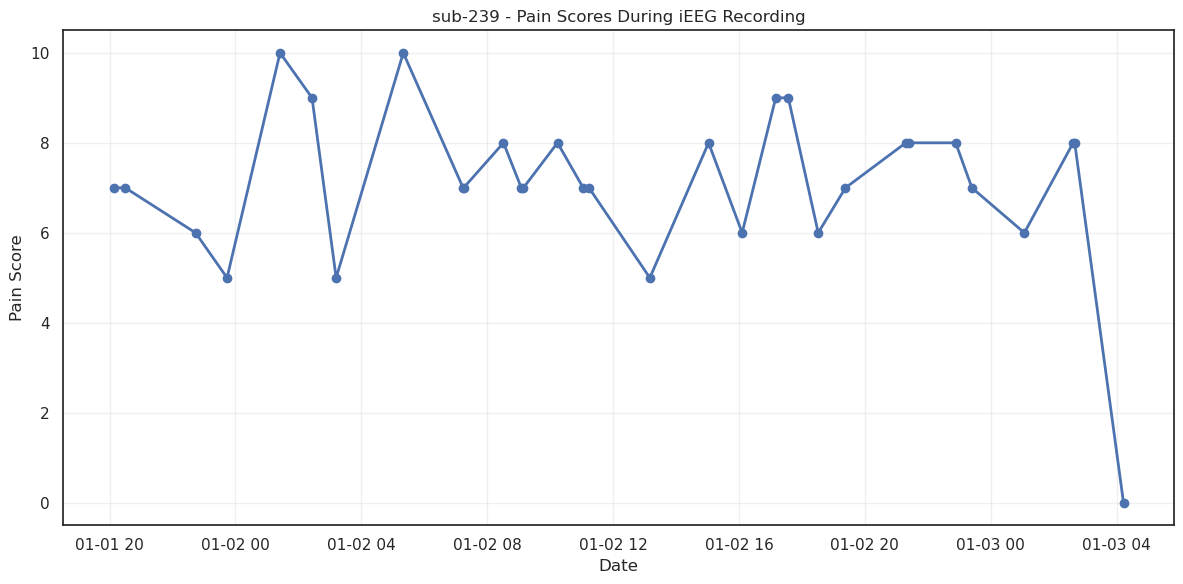

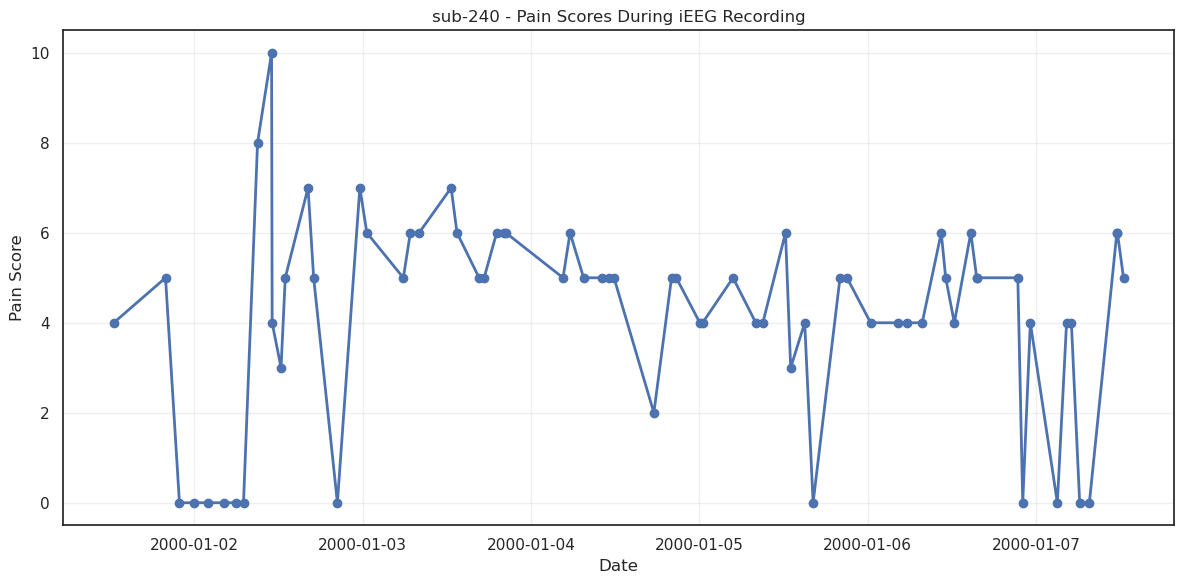

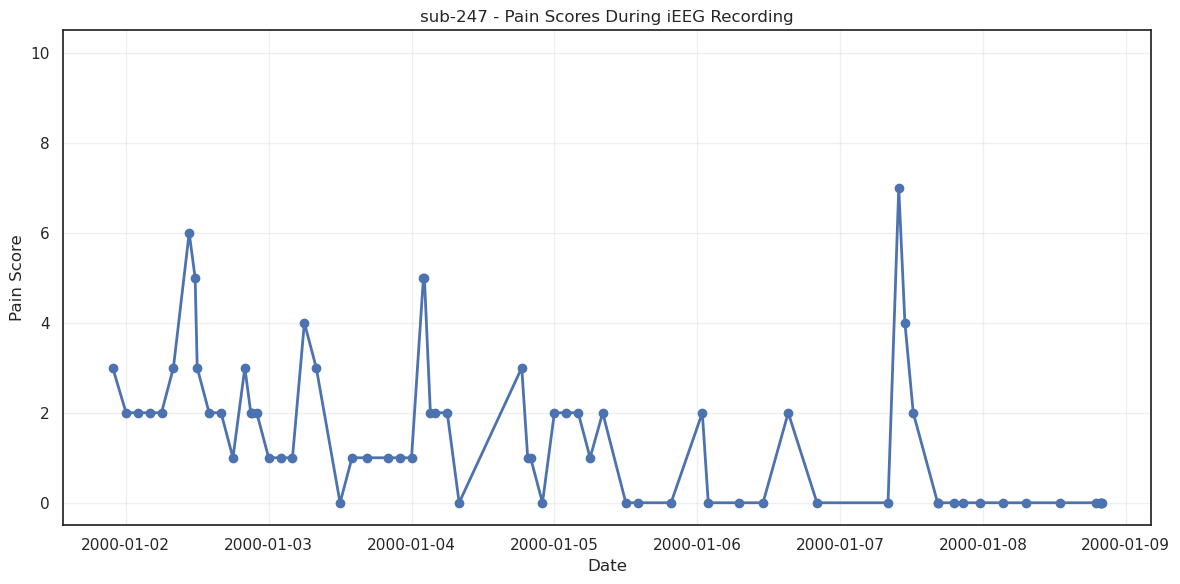

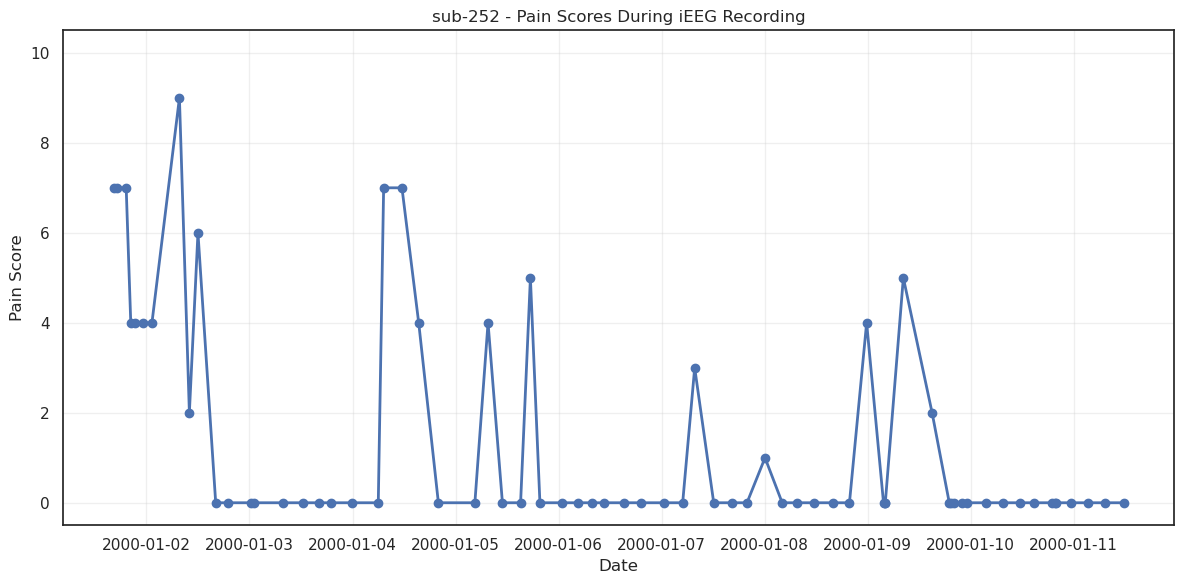

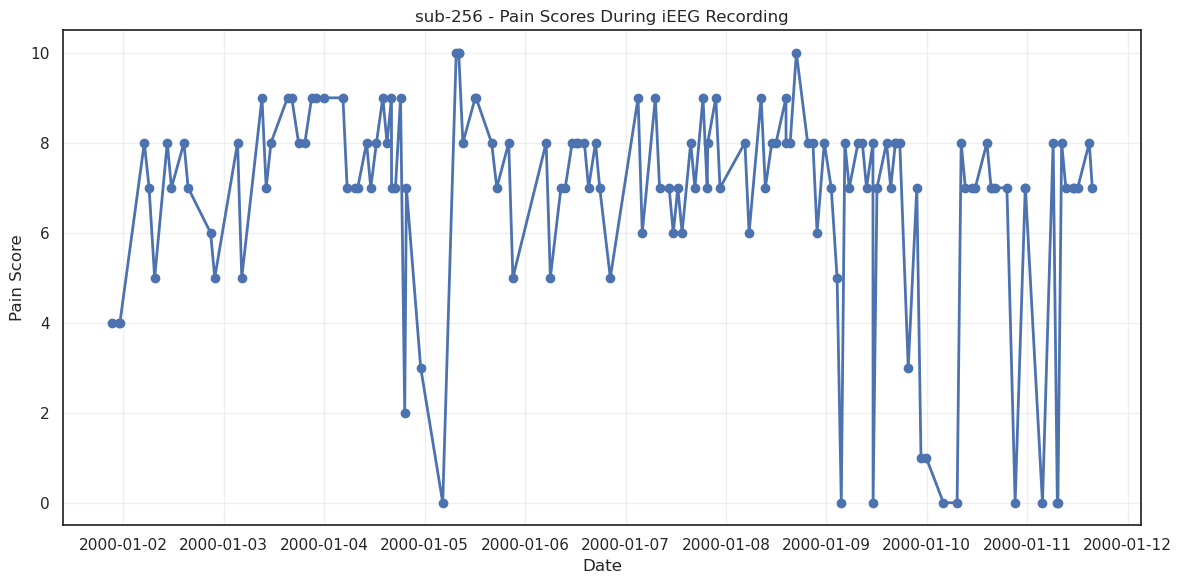

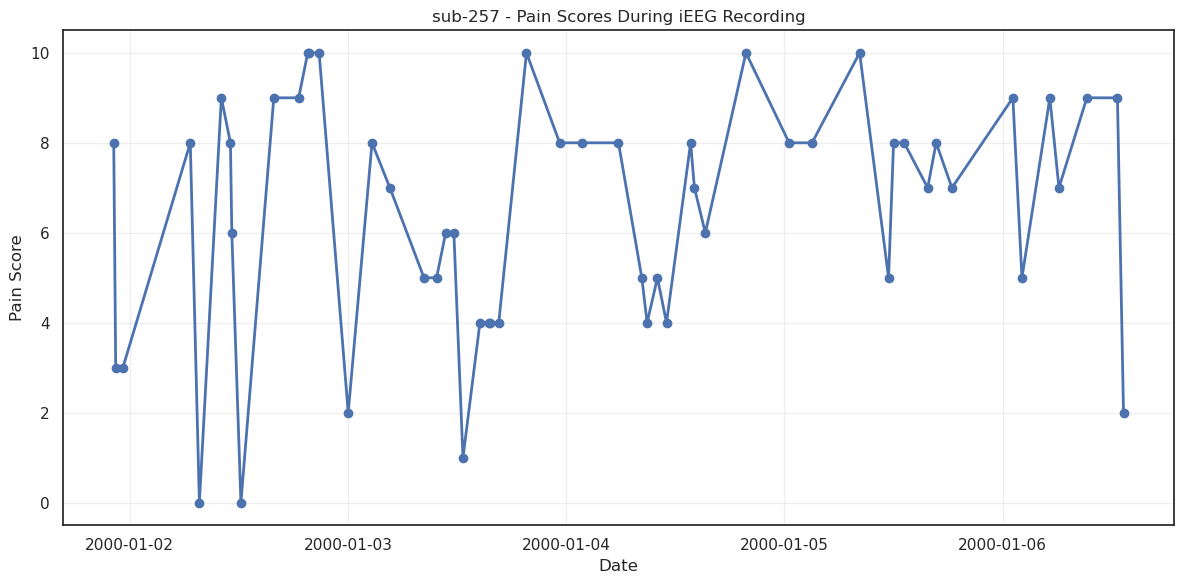

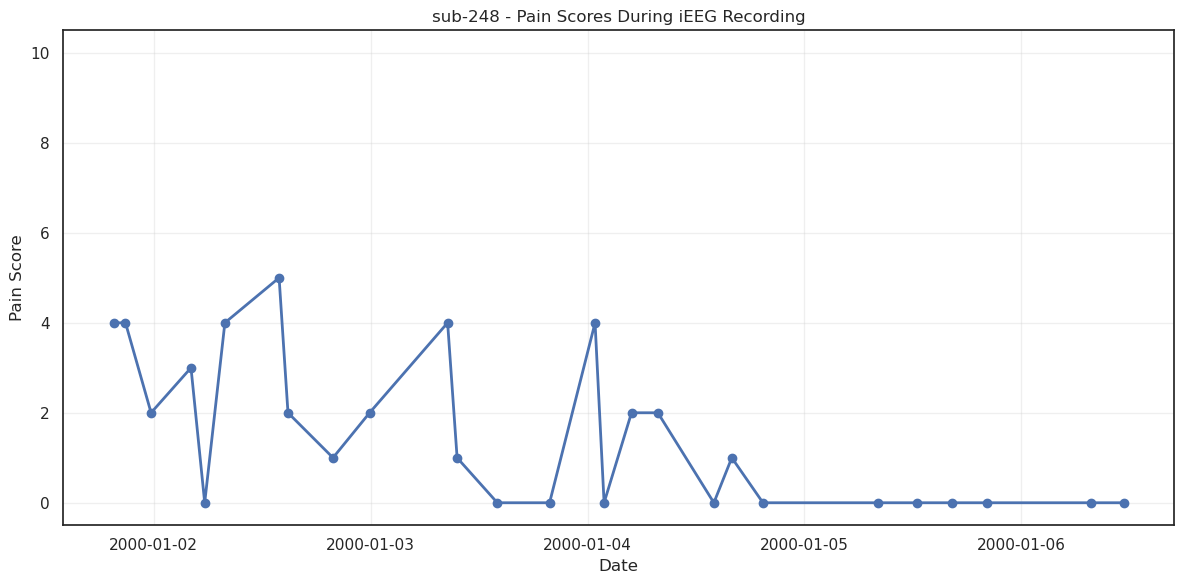

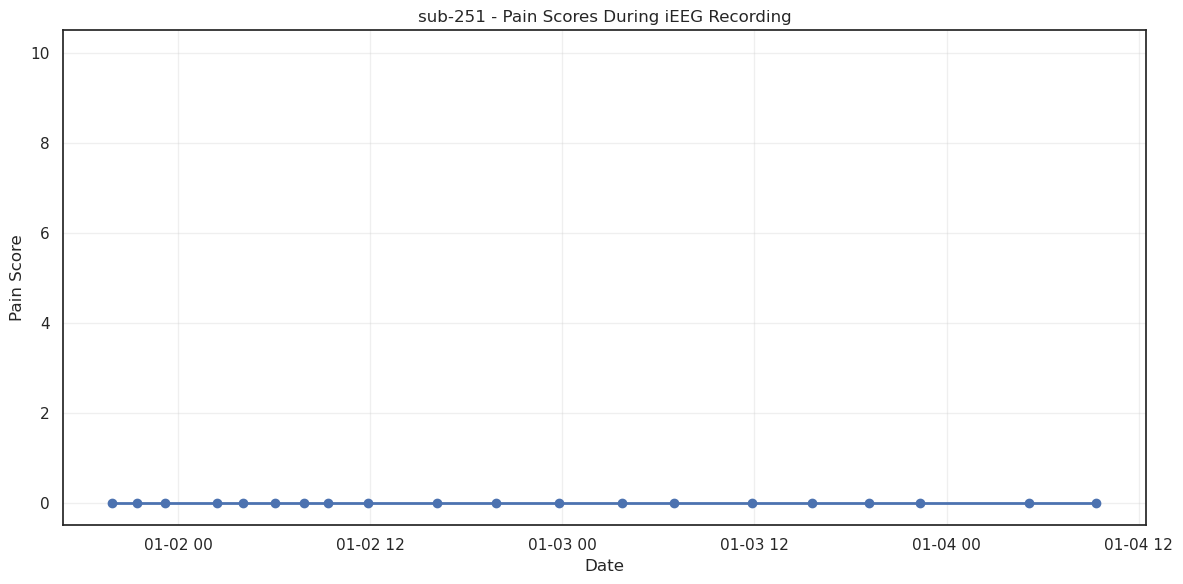

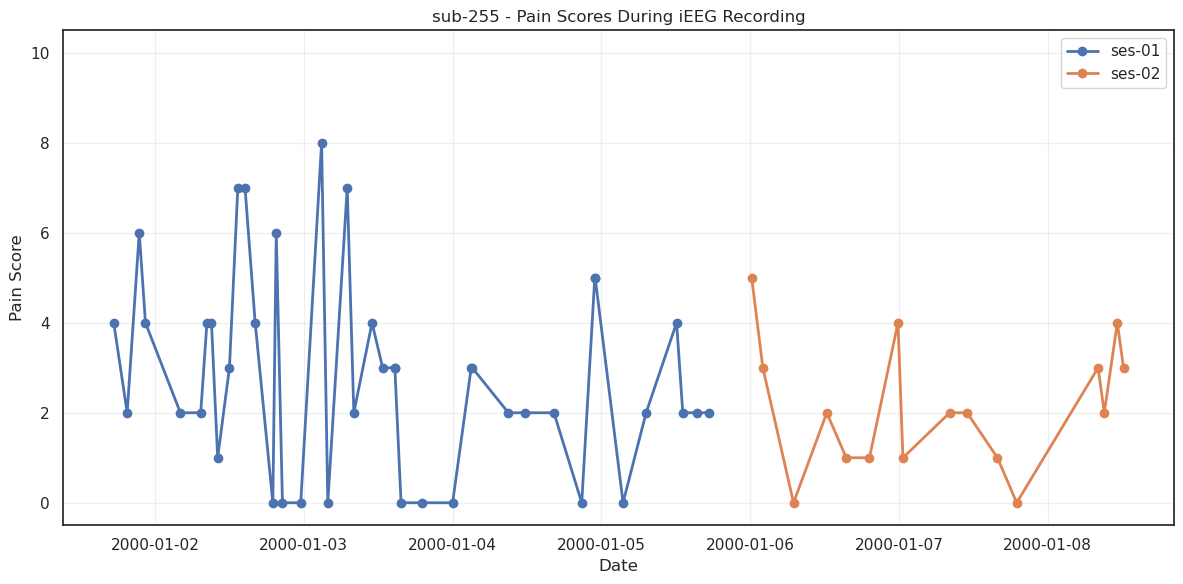


SUMMARY STATISTICS

Total participants: 9
Total sessions: 10
Total pain measurements: 534

Pain score distribution:
  Mean: 4.10
  Median: 4.00
  Std: 3.27
  Min: 0
  Max: 10

Pain measurements per session:
  Mean: 53.4
  Median: 48
  Min: 16
  Max: 137


In [52]:
# %%
"""
Load and visualize pain scores for all participants from individual session CSVs
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import numpy as np

# Set style
sns.set_theme(style="white")

# %%
# Configuration
BIDS_DIR = Path('/mnt/NAS/EHR/EHR_for_sherlock')

# %%
# Find all pain score CSV files
print("Searching for pain score files...")
pain_files = list(BIDS_DIR.glob('sub-*/ses-*/ehr/*_pain-scores.csv'))
print(f"Found {len(pain_files)} pain score files")

# %%
# Load all pain data
all_pain_data = []

for file in pain_files:
    df = pd.read_csv(file)
    df['date'] = pd.to_datetime(df['date'])
    all_pain_data.append(df)

# Combine all data
pain_df = pd.concat(all_pain_data, ignore_index=True)

print(f"\nLoaded {len(pain_df)} total pain measurements")
print(f"Participants: {pain_df['sub_id'].nunique()}")
print(f"Sessions: {len(pain_df.groupby(['sub_id', 'ses_id']))}")
print(f"Date range: {pain_df['date'].min()} to {pain_df['date'].max()}")

# %%
# Plot pain scores over time for each participant
participants = pain_df['sub_id'].unique()

print(f"\nPlotting {len(participants)} participants...")

for sub_id in participants:
    participant_data = pain_df[pain_df['sub_id'] == sub_id].sort_values('date')
    
    plt.figure(figsize=(12, 6))
    
    # Get all sessions for this participant
    sessions = participant_data['ses_id'].unique()
    
    # Plot each session with a different color
    for ses_id in sessions:
        session_data = participant_data[participant_data['ses_id'] == ses_id]
        plt.plot(session_data['date'], session_data['max_pain'], 
                marker='o', linewidth=2, label=ses_id)
    
    plt.xlabel('Date')
    plt.ylabel('Pain Score')
    plt.title(f'{sub_id} - Pain Scores During iEEG Recording')
    plt.ylim(-0.5, 10.5)
    plt.grid(True, alpha=0.3)
    
    # Add legend if multiple sessions
    if len(sessions) > 1:
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# %%
# Summary statistics
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nTotal participants: {pain_df['sub_id'].nunique()}")
print(f"Total sessions: {len(pain_df.groupby(['sub_id', 'ses_id']))}")
print(f"Total pain measurements: {len(pain_df)}")

print(f"\nPain score distribution:")
print(f"  Mean: {pain_df['max_pain'].mean():.2f}")
print(f"  Median: {pain_df['max_pain'].median():.2f}")
print(f"  Std: {pain_df['max_pain'].std():.2f}")
print(f"  Min: {pain_df['max_pain'].min():.0f}")
print(f"  Max: {pain_df['max_pain'].max():.0f}")

# Measurements per session
measurements_per_session = pain_df.groupby(['sub_id', 'ses_id']).size()
print(f"\nPain measurements per session:")
print(f"  Mean: {measurements_per_session.mean():.1f}")
print(f"  Median: {measurements_per_session.median():.0f}")
print(f"  Min: {measurements_per_session.min()}")
print(f"  Max: {measurements_per_session.max()}")


In [25]:
# %%
# Get statistics for sub-256 and sub-257
target_subs = ['sub-256', 'sub-257']

for sub_id in target_subs:
    sub_data = pain_df[pain_df['sub_id'] == sub_id]
    
    
    if len(sub_data) == 0:
        print(f"\n{sub_id}: No pain data found")
        continue
    
    print(f"\n{sub_id}")
    print("="*50)
    print(f"Number of measurements: {len(sub_data)}")
    print(f"Mean pain score: {sub_data['max_pain'].mean():.2f}")
    print(f"Median pain score: {sub_data['max_pain'].median():.2f}")
    print(f"Range: {sub_data['max_pain'].min():.0f} - {sub_data['max_pain'].max():.0f}")
    print(f"Standard deviation: {sub_data['max_pain'].std():.2f}")
    
    # Show session breakdown if multiple sessions
    sessions = sub_data['ses_id'].unique()
    if len(sessions) > 1:
        print(f"\nSessions: {len(sessions)}")
        for ses_id in sessions:
            ses_data = sub_data[sub_data['ses_id'] == ses_id]
            print(f"  {ses_id}: {len(ses_data)} measurements, "
                  f"mean={ses_data['max_pain'].mean():.2f}, "
                  f"median={ses_data['max_pain'].median():.2f}")



sub-256
Number of measurements: 137
Mean pain score: 6.80
Median pain score: 7.00
Range: 0 - 10
Standard deviation: 2.39

sub-257
Number of measurements: 54
Mean pain score: 6.50
Median pain score: 7.00
Range: 0 - 10
Standard deviation: 2.68


In [77]:
import pynwb

processed_path = '/home/klab/Downloads/sub-257_ses-01_run-FA6153CF_bipolar_psd.nwb'
io = pynwb.NWBHDF5IO(processed_path, 'r')
nwb = io.read()

/home/klab/anaconda3/envs/iEEG_EHR_Analysis/lib/python3.14/site-packages/pynwb/misc.py:331: UserWarning: Neither source_timeseries nor source_channels is present in DecompositionSeries. It is recommended to indicate the source timeseries if it is present, or else to link to the corresponding source_channels. (Optional)
  warnings.warn("Neither source_timeseries nor source_channels is present in DecompositionSeries. It is "


In [78]:
nwb

root pynwb.file.NWBFile at 0x139653176935696
Fields:
  devices: {
    NihonKohden <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    sEEG_bipolar <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'pynwb.ecephys.ElectrodesTable'>
  experimenter: ['Keller Lab']
  file_create_date: [datetime.datetime(2026, 2, 6, 11, 24, 25, 644107, tzinfo=tzoffset(None, -28800))]
  identifier: sub-257_ses-01_bipolar_psd
  institution: Stanford University
  lab: Precision Neurotherapeutics Lab
  processing: {
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: iEEG recording from patient sub-257 - bipolar referenced, band power computed
  session_start_time: 2000-01-06 12:11:13-08:00
  subject: subject pynwb.file.Subject at 0x139652875953376
Fields:
  age__reference: birth
  description: Epilepsy patient with intracranial electrodes
  subject_id: sub-257

  timestamps_reference_time: 2000-01-06 12:11:13-08:00

In [79]:
nwb.electrodes.to_dataframe

<bound method docval.<locals>.dec.<locals>.func_call of electrodes pynwb.ecephys.ElectrodesTable at 0x139652785486288
Fields:
  colnames: ['location' 'group' 'MNI_coord_1' 'MNI_coord_2' 'MNI_coord_3'
 'LEPTO_coord_1' 'LEPTO_coord_2' 'LEPTO_coord_3' 'MGRID_coord_1'
 'MGRID_coord_2' 'MGRID_coord_3' 'subINF_coord_1' 'subINF_coord_2'
 'subINF_coord_3' 'fsaverageINF_coord_1' 'fsaverageINF_coord_2'
 'fsaverageINF_coord_3' 'ScannerNativeRAS_coord_1'
 'ScannerNativeRAS_coord_2' 'ScannerNativeRAS_coord_3' 'chan_num_anode'
 'chan_num_cathode' 'FS_label_anode' 'FS_label_cathode' 'FS_vol_anode'
 'FS_vol_cathode' 'FS_ind_anode' 'FS_ind_cathode' 'WMvsGM_anode'
 'WMvsGM_cathode' 'LvsR_anode' 'LvsR_cathode' 'sEEG_ECoG_anode'
 'sEEG_ECoG_cathode' 'Desikan_Killiany_anode' 'Desikan_Killiany_cathode'
 'DK_ind_anode' 'DK_ind_cathode' 'DK_lobe_anode' 'DK_lobe_cathode'
 'Destrieux_anode' 'Destrieux_cathode' 'Destr_ind_anode'
 'Destr_ind_cathode' 'Destr_long_anode' 'Destr_long_cathode' 'Yeo7_anode'
 'Yeo7_cat

In [69]:
pain_df

sub_id  ses_id                date  max_pain        session_start  \
0    sub-239  ses-01 2000-01-01 20:08:00       7.0  2000-01-01 19:02:22   
1    sub-239  ses-01 2000-01-01 20:30:00       7.0  2000-01-01 19:02:22   
2    sub-239  ses-01 2000-01-01 22:44:00       6.0  2000-01-01 19:02:22   
3    sub-239  ses-01 2000-01-01 23:44:00       5.0  2000-01-01 19:02:22   
4    sub-239  ses-01 2000-01-02 01:25:00      10.0  2000-01-01 19:02:22   
..       ...     ...                 ...       ...                  ...   
529  sub-255  ses-02 2000-01-07 19:00:00       0.0  2000-01-05 23:00:56   
530  sub-255  ses-02 2000-01-08 08:08:00       3.0  2000-01-05 23:00:56   
531  sub-255  ses-02 2000-01-08 09:08:00       2.0  2000-01-05 23:00:56   
532  sub-255  ses-02 2000-01-08 11:14:00       4.0  2000-01-05 23:00:56   
533  sub-255  ses-02 2000-01-08 12:14:00       3.0  2000-01-05 23:00:56   

             session_end  
0    2000-01-03 05:02:22  
1    2000-01-03 05:02:22  
2    2000-01-03 05:02:22  
3    2000-01-03 05:02:22  
4    2000-01-03 05:02:22  
..                   ...  
529  2000-01-08 13:37:22  
530  2000-01-08 13:37:22  
531  2000-01-08 13:37:22  
532  2000-01-08 13:37:22  
533  2000-01-08 13:37:22  

[534 rows x 6 columns]

In [65]:
# %%
# ============================================================================
# PLOTTING PARAMETERS - Change these to customize your plots
# ============================================================================

# Time window to visualize (in minutes)
# Set to None to use all data, or specify [start_min, end_min]
time_range_minutes = None  # Example: [10, 20] for minutes 10-20

# Channels to plot in multi-channel plots
channels_to_plot = list(range(4, 100))

# Channel to use for single-channel plots (Plot 2 and Plot 3)
single_channel = 0

# Frequency bands to include
band_names = ['delta', 'theta', 'alpha', 'beta', 'gamma', 'high_gamma']

# Figure size for plots
figure_size = (15, 6)

# Plot transparency (alpha)
plot_alpha = 0.7

# ============================================================================
# END OF PARAMETERS
# ============================================================================

# Load band power data
band_power_series = nwb.processing['ecephys']["band_power"]
band_power_data = band_power_series.data[:]

# Check if timestamps exist, otherwise use starting_time and rate
if band_power_series.timestamps is not None:
    band_power_timestamps = band_power_series.timestamps[:]
else:
    # Reconstruct timestamps from starting_time and rate
    starting_time = band_power_series.starting_time
    rate = band_power_series.rate
    n_timepoints = band_power_data.shape[0]
    band_power_timestamps = starting_time + np.arange(n_timepoints) / rate
    print(f"Reconstructed timestamps from starting_time={starting_time} and rate={rate} Hz")

# Convert to minutes for time range selection
time_minutes_full = band_power_timestamps / 60

# Apply time range filter if specified
if time_range_minutes is not None:
    start_min, end_min = time_range_minutes
    # Find indices corresponding to the time range
    time_mask = (time_minutes_full >= start_min) & (time_minutes_full <= end_min)
    band_power_data = band_power_data[time_mask, :, :]
    band_power_timestamps = band_power_timestamps[time_mask]
    print(f"\nFiltering to time range: {start_min} - {end_min} minutes")
    time_label = f" ({start_min}-{end_min} min)"
else:
    print("\nUsing full time range")
    time_label = ""

print(f"Band power shape: {band_power_data.shape}")
print(f"  Timepoints: {band_power_data.shape[0]}")
print(f"  Channels: {band_power_data.shape[1]}")
print(f"  Frequency bands: {band_power_data.shape[2]}")
print(f"\nTime range: {band_power_timestamps[0]:.2f} to {band_power_timestamps[-1]:.2f} seconds")
print(f"             ({band_power_timestamps[0]/60:.2f} to {band_power_timestamps[-1]/60:.2f} minutes)")

# Convert to minutes for plotting
time_minutes = band_power_timestamps / 60

# %%
# Plot 1: Each frequency band showing multiple channels
for band_idx, band_name in enumerate(band_names):
    plt.figure(figsize=figure_size)
    for ch_idx in channels_to_plot:
        channel_band_data = band_power_data[:, ch_idx, band_idx]
        plt.plot(time_minutes, channel_band_data, label=f'Channel {ch_idx}', alpha=plot_alpha)
    plt.xlabel('Time (minutes)')
    plt.ylabel('Band Power')
    plt.title(f'{band_name.capitalize()} Band Power Over Time{time_label}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# %%
# Plot 2: Single channel showing all frequency bands
plt.figure(figsize=figure_size)
for band_idx, band_name in enumerate(band_names):
    channel_band_data = band_power_data[:, single_channel, band_idx]
    plt.plot(time_minutes, channel_band_data, label=band_name.capitalize(), alpha=plot_alpha)
plt.xlabel('Time (minutes)')
plt.ylabel('Band Power')
plt.title(f'All Frequency Bands - Channel {single_channel}{time_label}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Plot 3: Heatmap for a single channel (all bands over time)
plt.figure(figsize=figure_size)
plt.imshow(band_power_data[:, single_channel, :].T, aspect='auto', cmap='viridis', 
           extent=[time_minutes[0], time_minutes[-1], 0, len(band_names)])
plt.colorbar(label='Band Power')
plt.yticks(np.arange(len(band_names)) + 0.5, [b.capitalize() for b in band_names])
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency Band')
plt.title(f'Band Power Heatmap - Channel {single_channel}{time_label}')
plt.tight_layout()
plt.show()

# %%
# Close NWB file
io.close()
print("\nNWB file closed")

OSError: Can't synchronously read data (identifier is not of specified type)

Reconstructed timestamps from starting_time=0.0 and rate=0.01666666753590107 Hz
Band power shape (second half): (60, 213, 6)
  Timepoints: 60
  Channels: 213
  Frequency bands: 6

Time range: 3600.00 to 7140.00 seconds


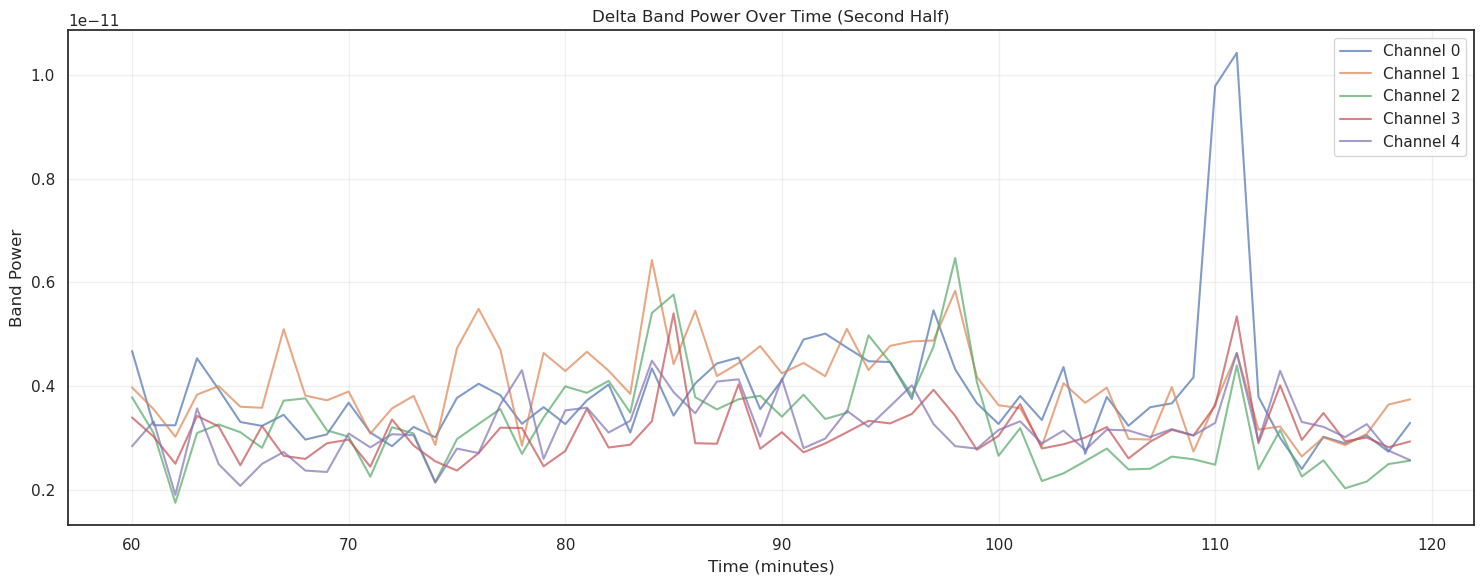

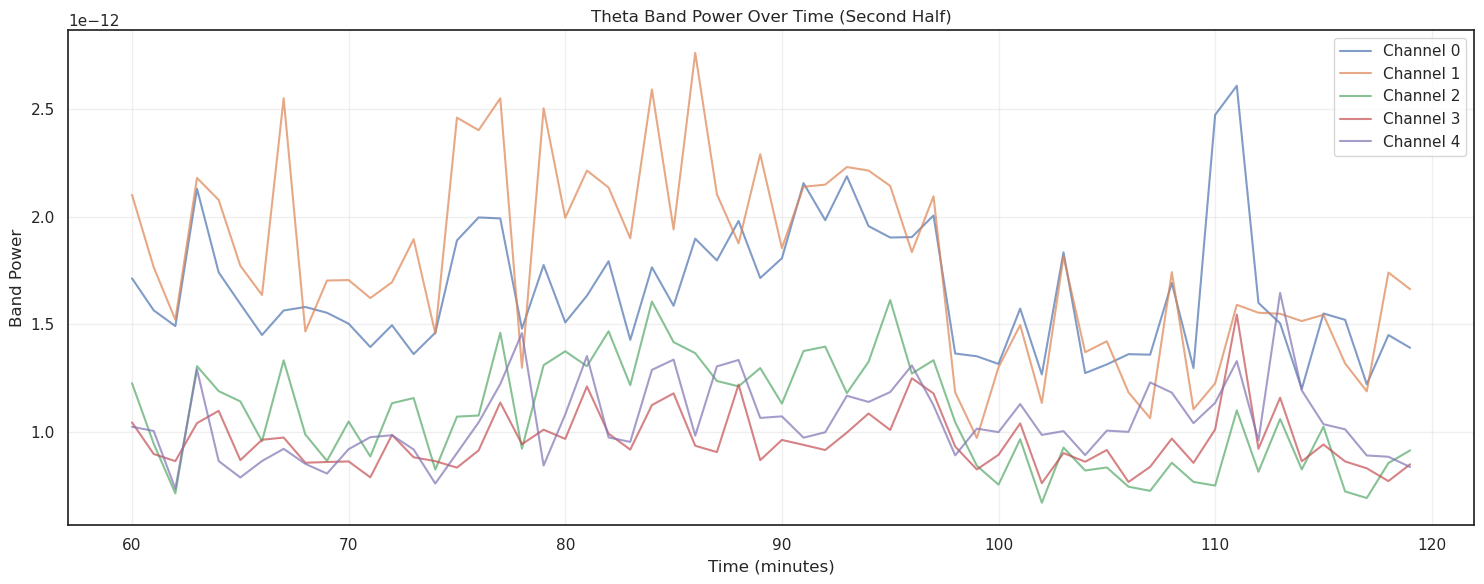

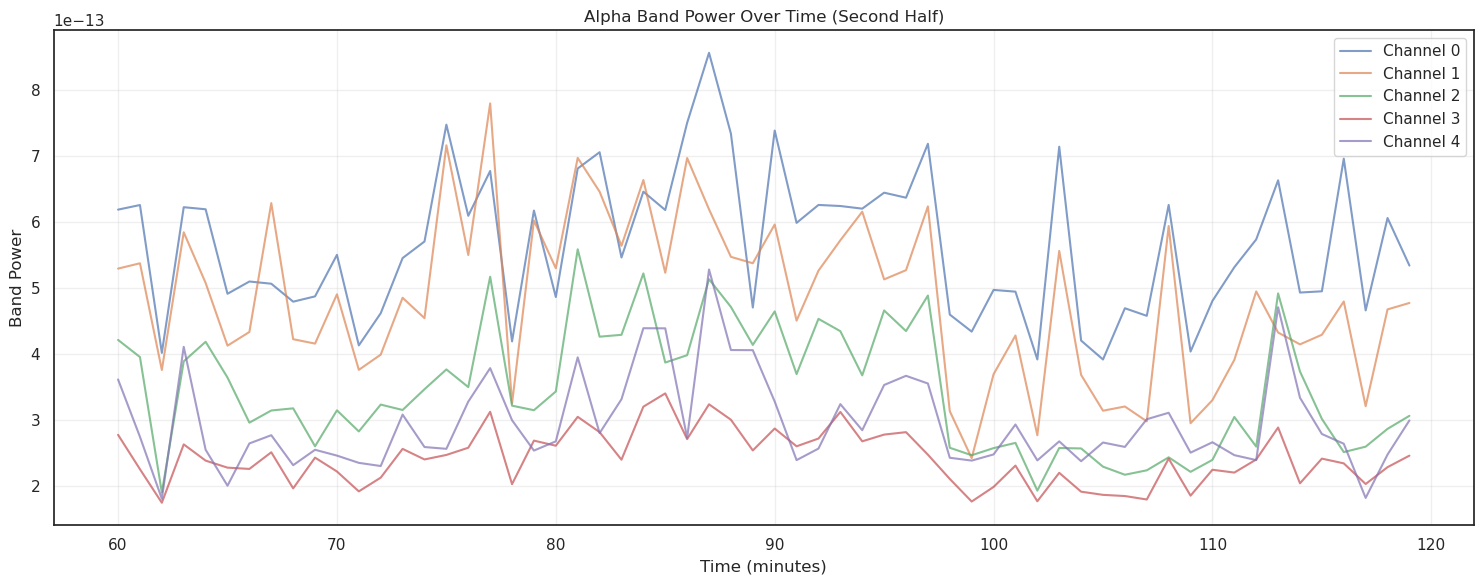

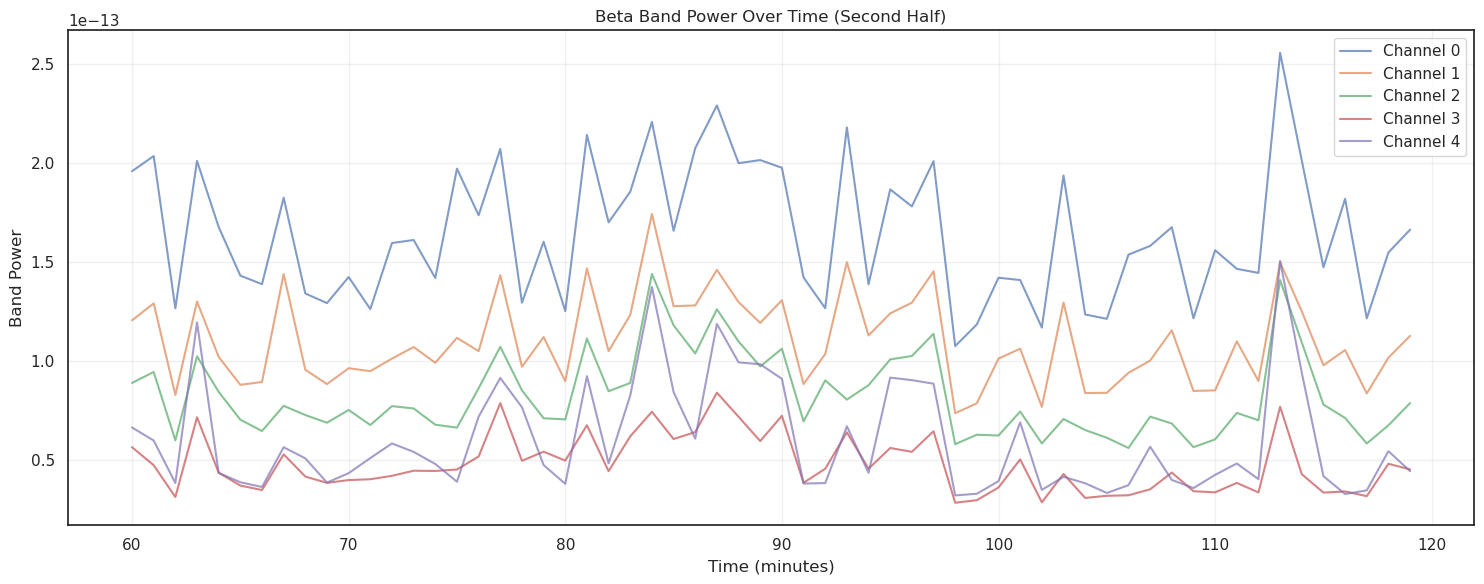

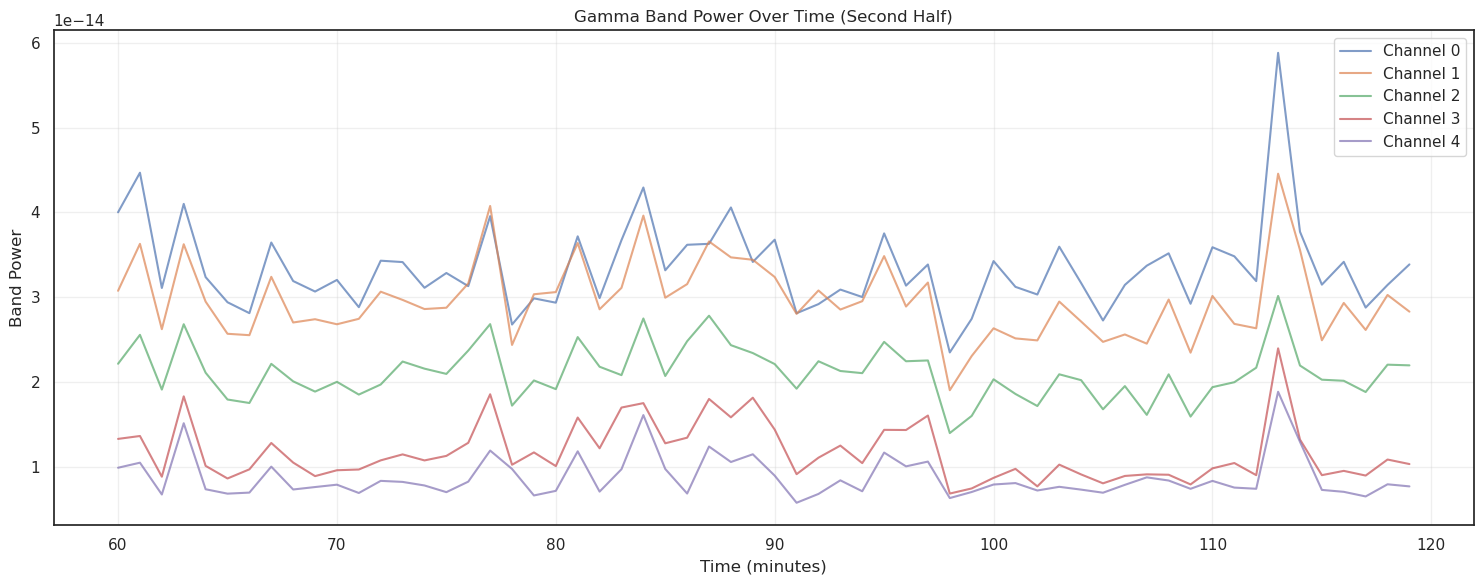

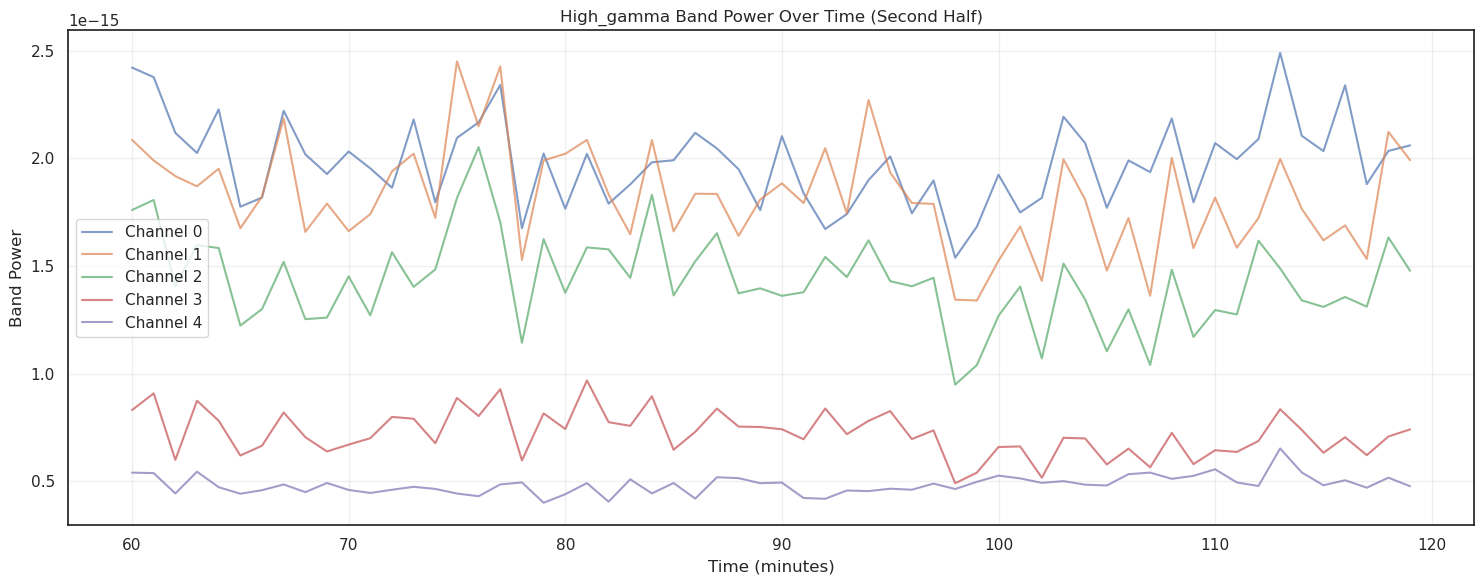

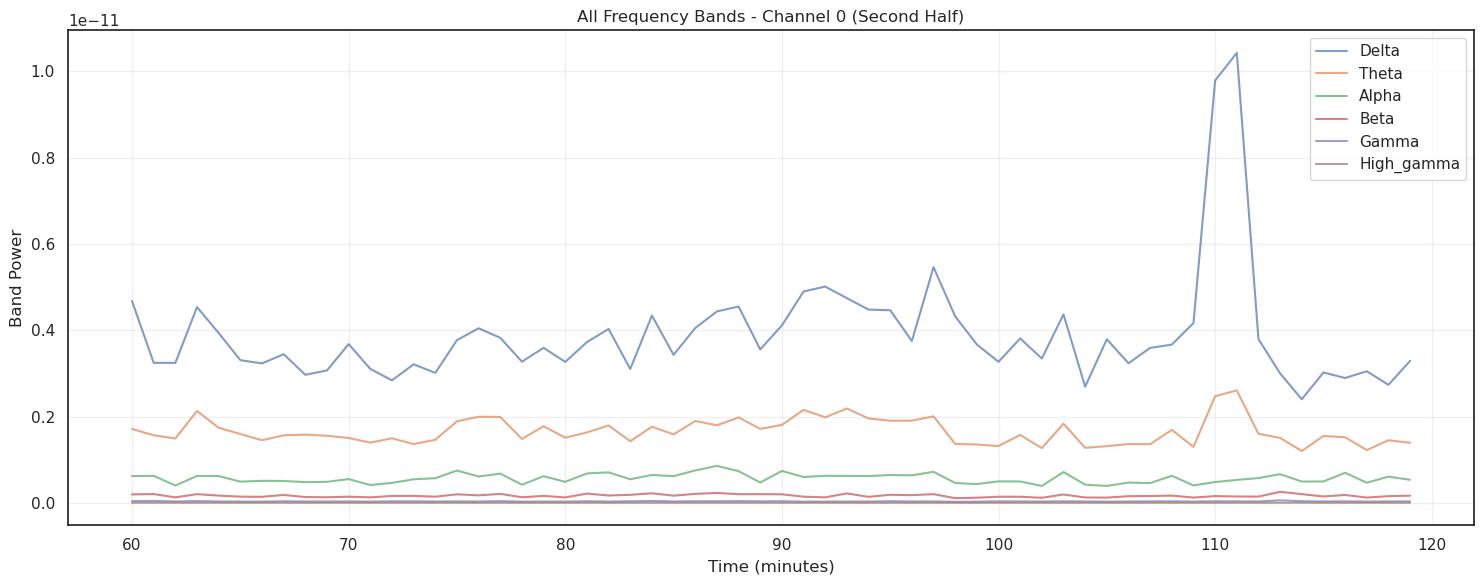

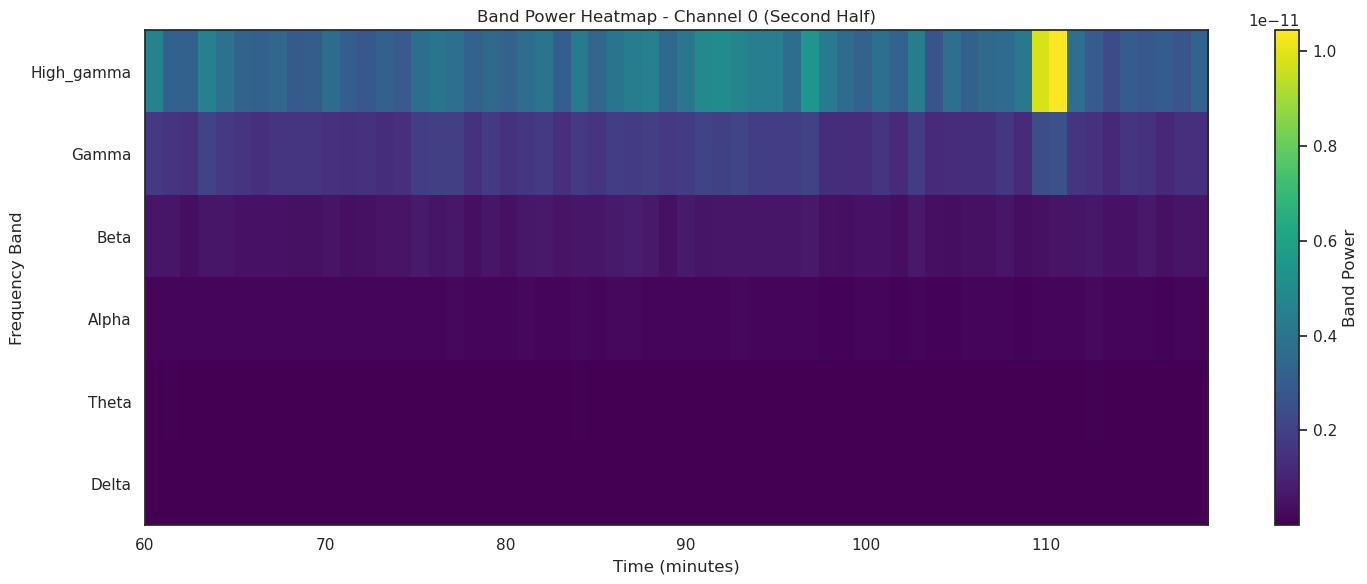


NWB file closed


In [70]:
# %%
# Load band power data
band_power_series = nwb.processing['ecephys']["band_power"]
band_power_data = band_power_series.data[:]

# Check if timestamps exist, otherwise use starting_time and rate
if band_power_series.timestamps is not None:
    band_power_timestamps = band_power_series.timestamps[:]
else:
    # Reconstruct timestamps from starting_time and rate
    starting_time = band_power_series.startingio.close()
print("\nNWB file closed")
# Slice to get only second half
band_power_data = band_power_data[midpoint_idx:, :, :]
band_power_timestamps = band_power_timestamps[midpoint_idx:]

print(f"Band power shape (second half): {band_power_data.shape}")
print(f"  Timepoints: {band_power_data.shape[0]}")
print(f"  Channels: {band_power_data.shape[1]}")
print(f"  Frequency bands: {band_power_data.shape[2]}")
print(f"\nTime range: {band_power_timestamps[0]:.2f} to {band_power_timestamps[-1]:.2f} seconds")

# Convert to minutes
time_minutes = band_power_timestamps / 60

# %%
# Define frequency bands
band_names = ['delta', 'theta', 'alpha', 'beta', 'gamma', 'high_gamma']

# Select channels to plot
channels_to_plot = [0, 1, 2, 3, 4]  # First 5 channels

# %%
# Plot 1: Each frequency band showing multiple channels
for band_idx, band_name in enumerate(band_names):
    plt.figure(figsize=(15, 6))
    for ch_idx in channels_to_plot:
        channel_band_data = band_power_data[:, ch_idx, band_idx]
        plt.plot(time_minutes, channel_band_data, label=f'Channel {ch_idx}', alpha=0.7)
    plt.xlabel('Time (minutes)')
    plt.ylabel('Band Power')
    plt.title(f'{band_name.capitalize()} Band Power Over Time (Second Half)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# %%
# Plot 2: Single channel showing all frequency bands
channel = 0
plt.figure(figsize=(15, 6))
for band_idx, band_name in enumerate(band_names):
    channel_band_data = band_power_data[:, channel, band_idx]
    plt.plot(time_minutes, channel_band_data, label=band_name.capitalize(), alpha=0.7)
plt.xlabel('Time (minutes)')
plt.ylabel('Band Power')io.close()
print("\nNWB file closed")
plt.title(f'All Frequency Bands - Channel {channel} (Second Half)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Plot 3: Heatmap for a single channel (all bands over time)
channel = 0
plt.figure(figsize=(15, 6))
plt.imshow(band_power_data[:, channel, :].T, aspect='auto', cmap='viridis', 
           extent=[time_minutes[0], time_minutes[-1], 0, len(band_names)])
plt.colorbar(label='Band Power')
plt.yticks(np.arange(len(band_names)) + 0.5, [b.capitalize() for b in band_names])
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency Band')
plt.title(f'Band Power Heatmap - Channel {channel} (Second Half)')
plt.tight_layout()
plt.show()

# %%
# Close NWB file

Reconstructed timestamps from starting_time=0.0 and rate=0.01666666753590107 Hz

Filtering to time range: 80 - 90 minutes
Band power shape: (10, 213, 6)
  Timepoints: 10
  Channels: 213
  Frequency bands: 6

Time range: 4860.00 to 5400.00 seconds
             (81.00 to 90.00 minutes)


/tmp/ipykernel_983321/2768959948.py:82: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


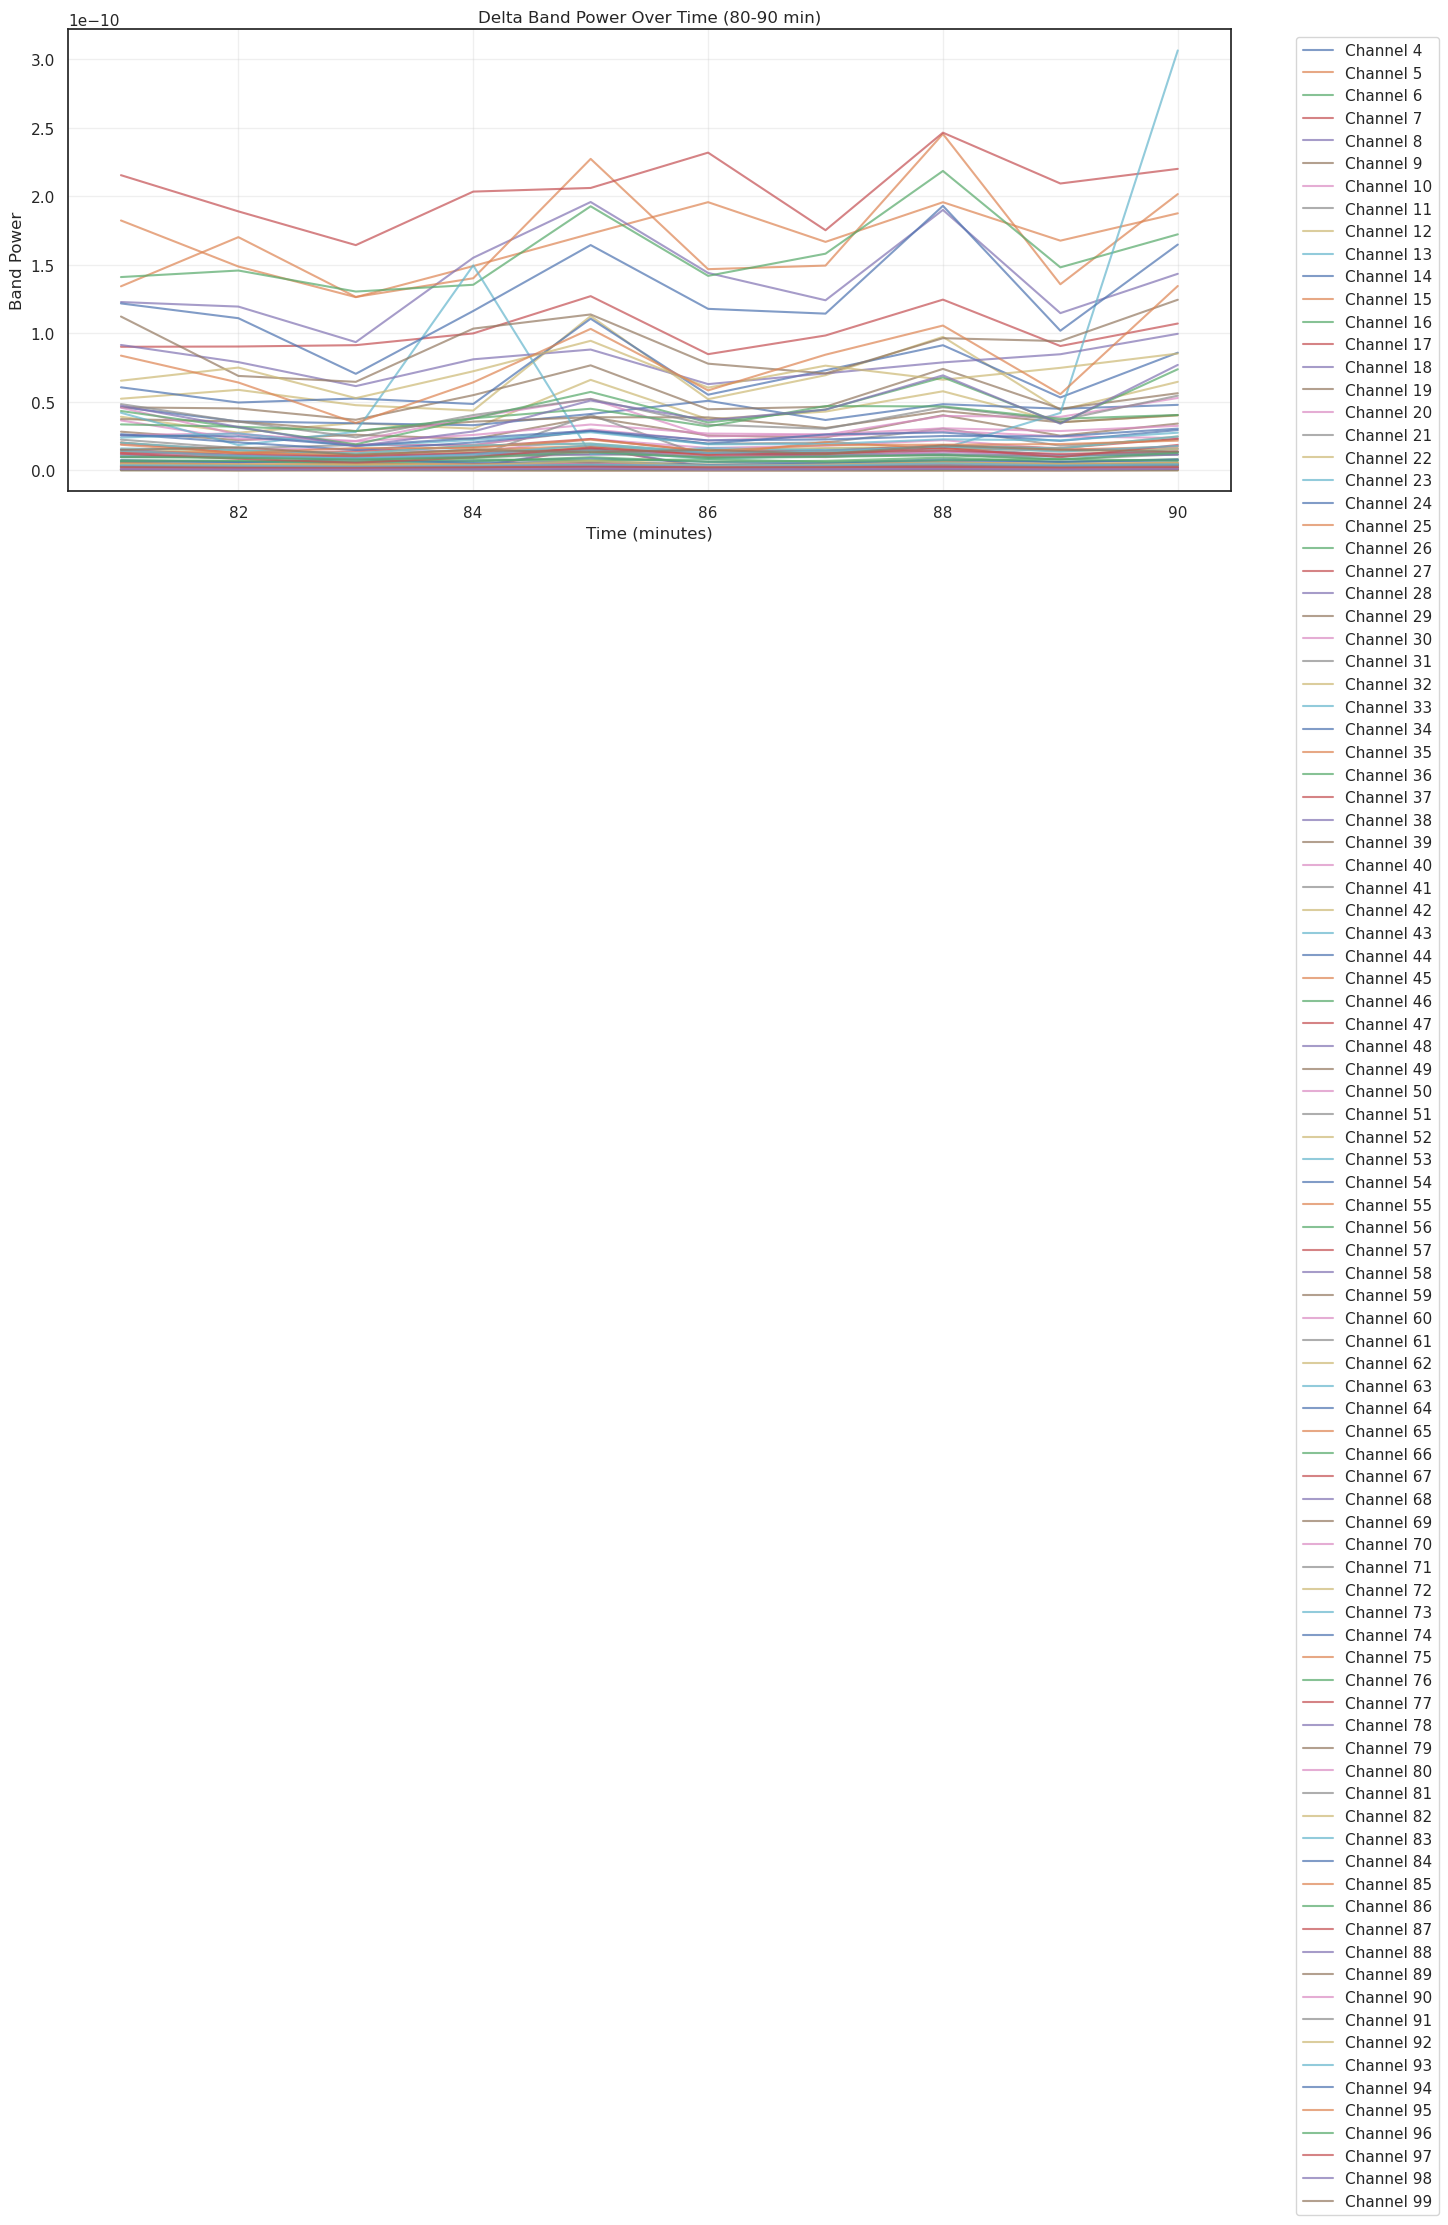

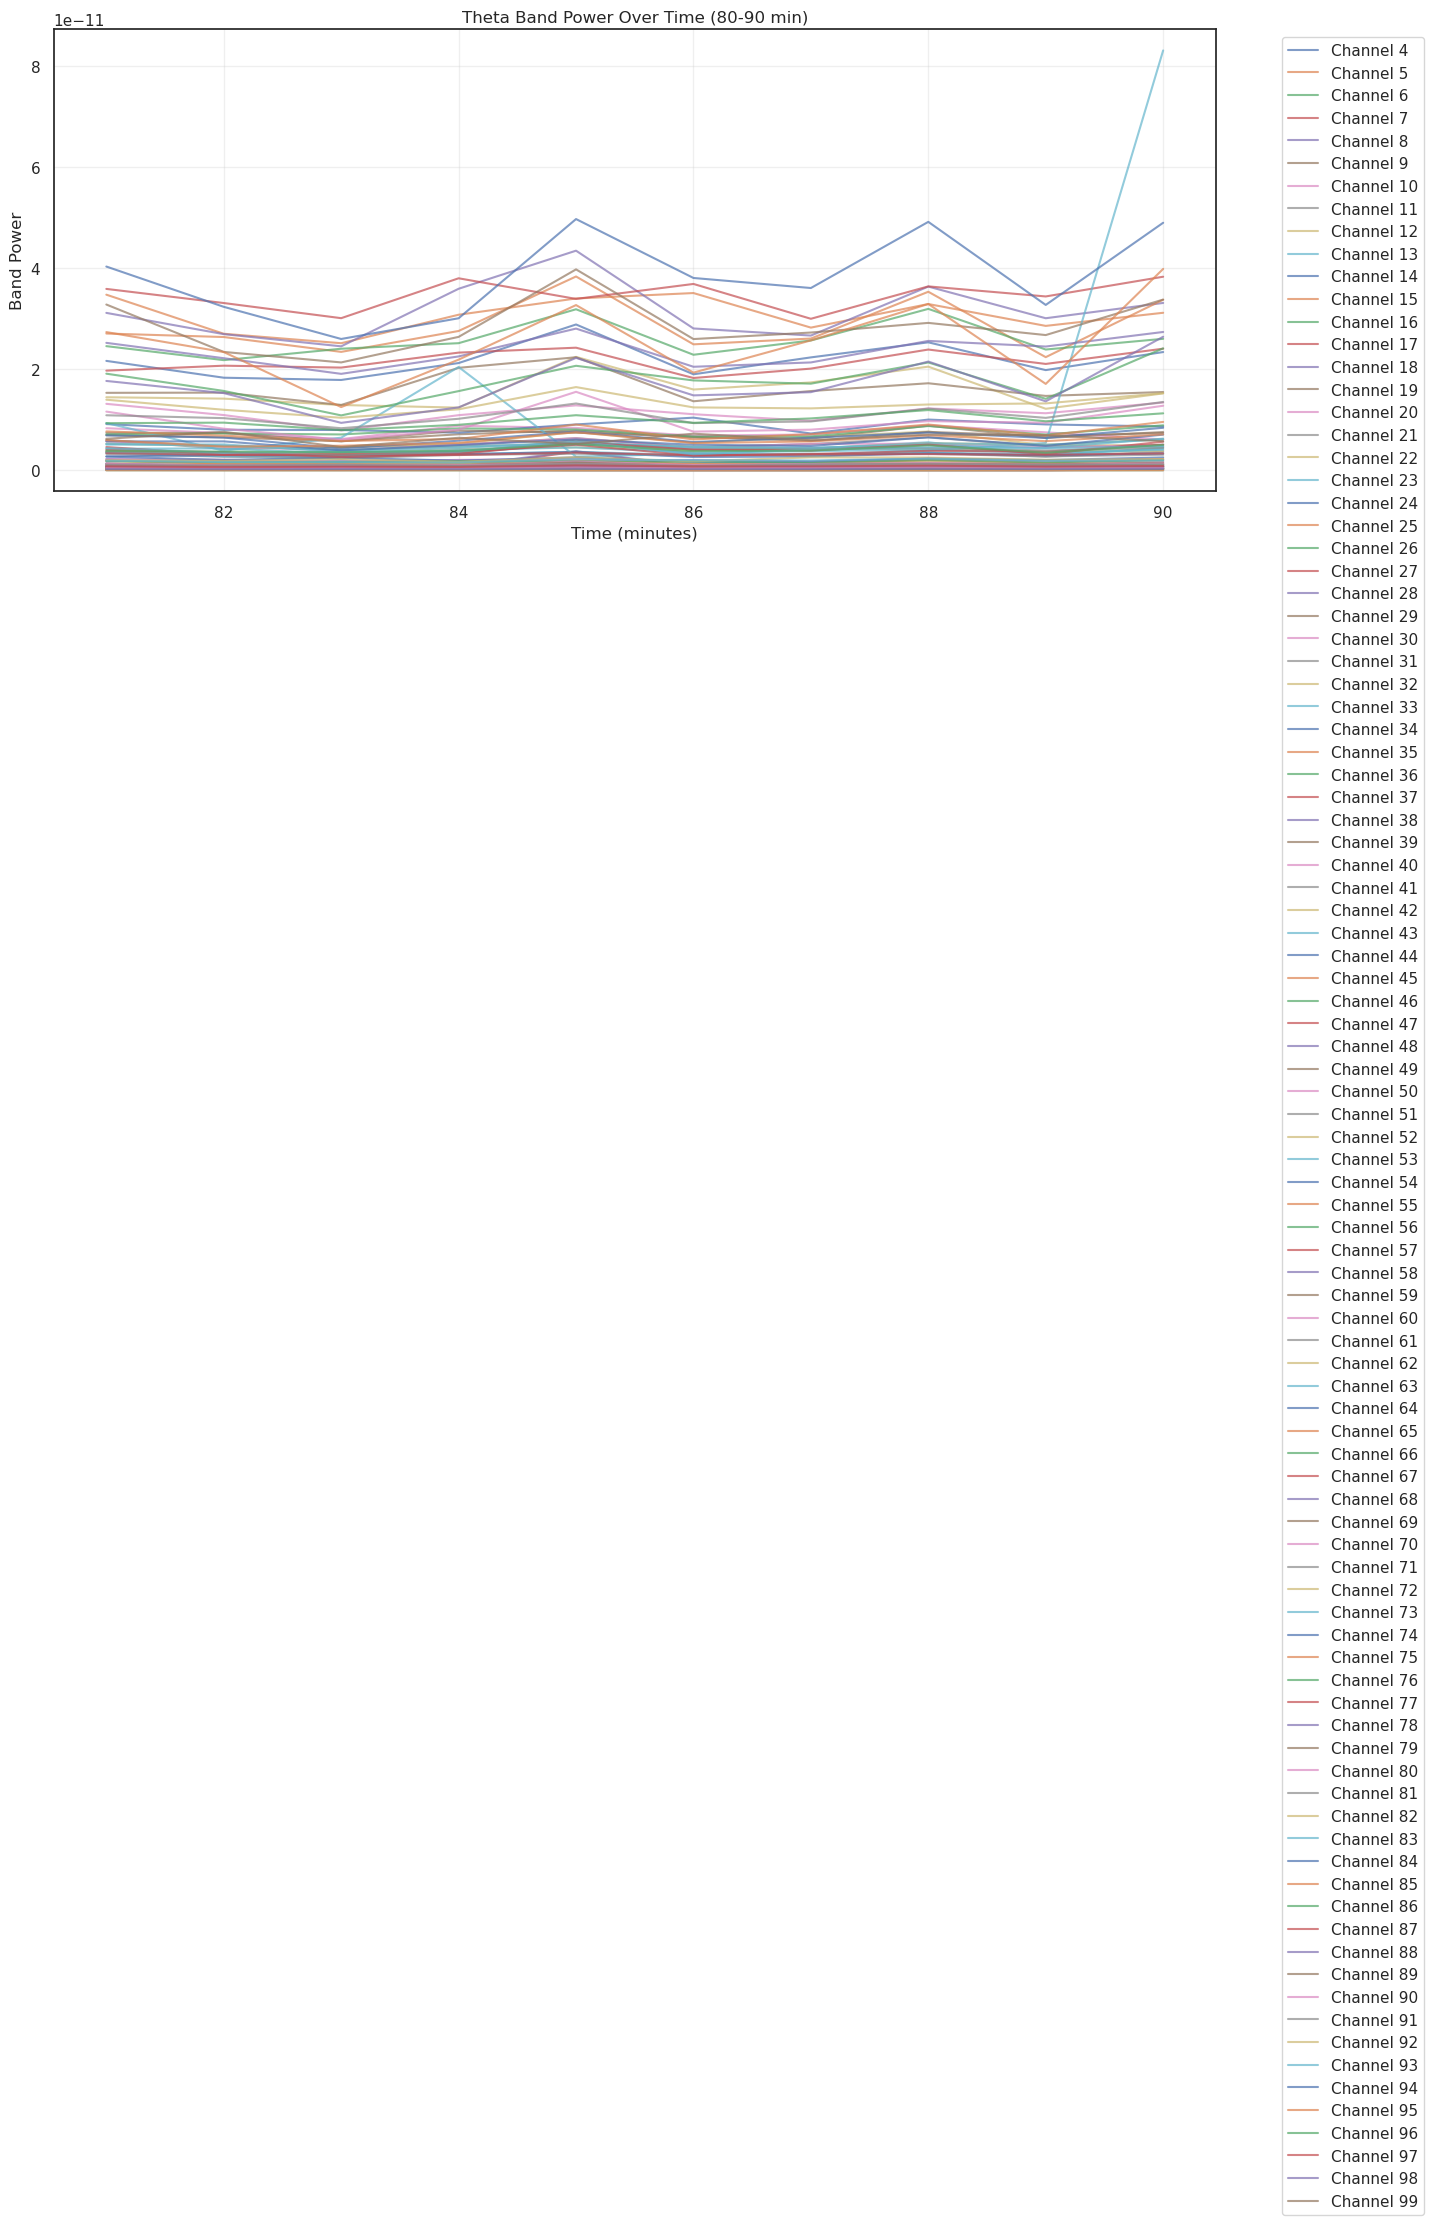

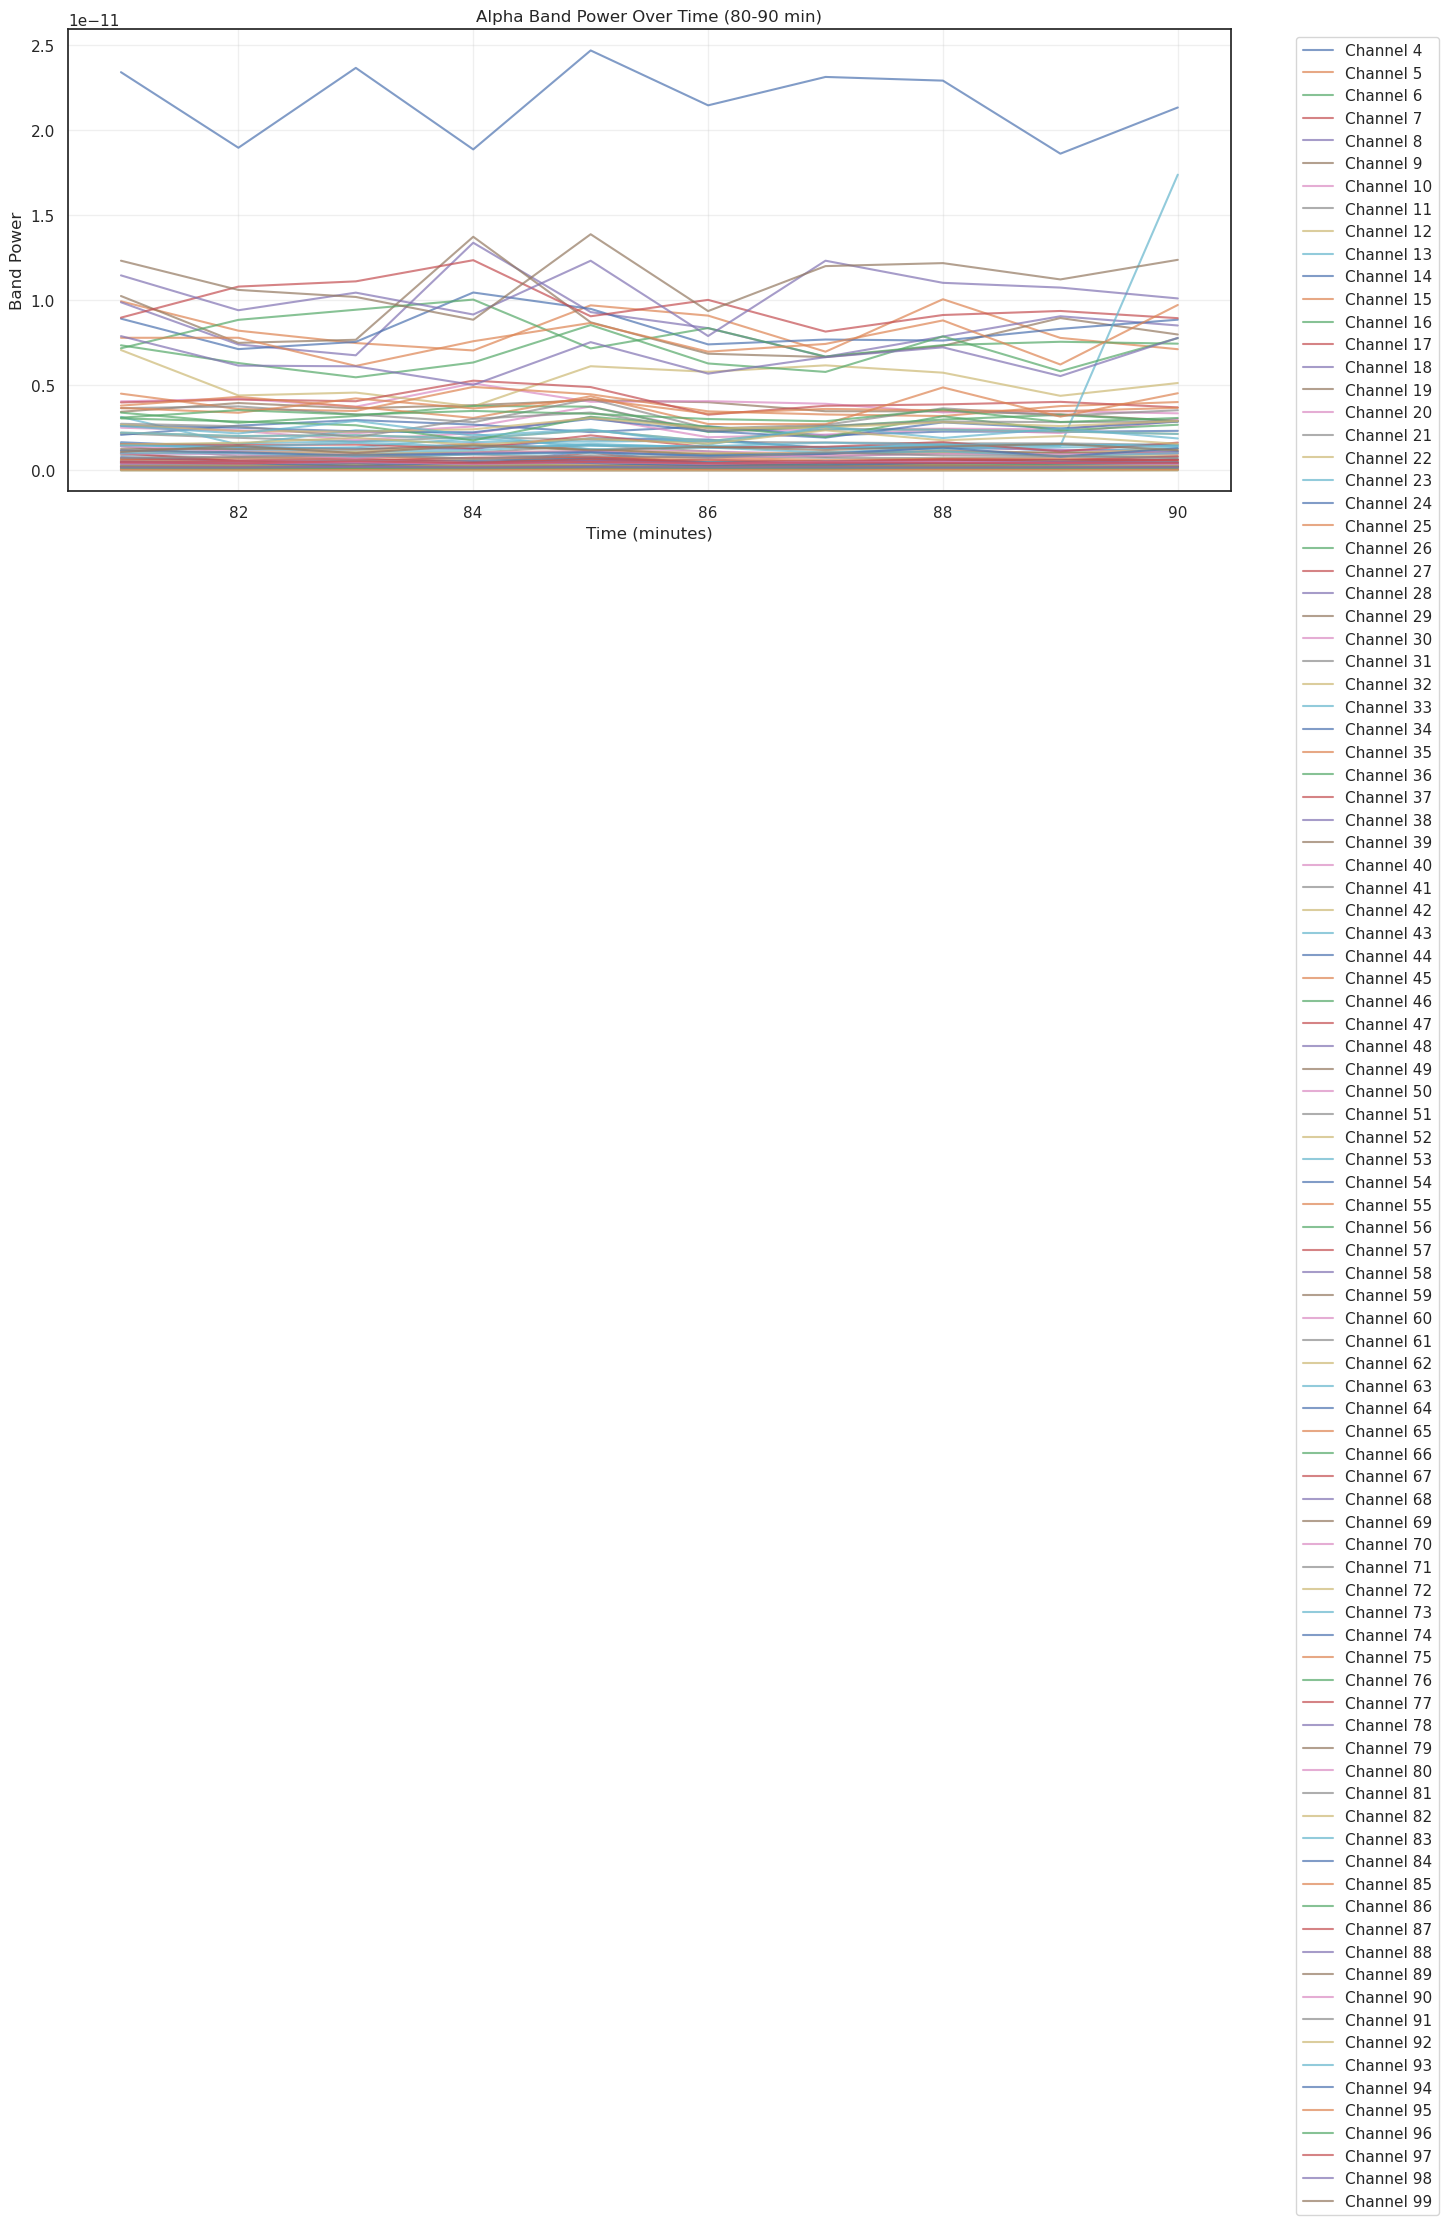

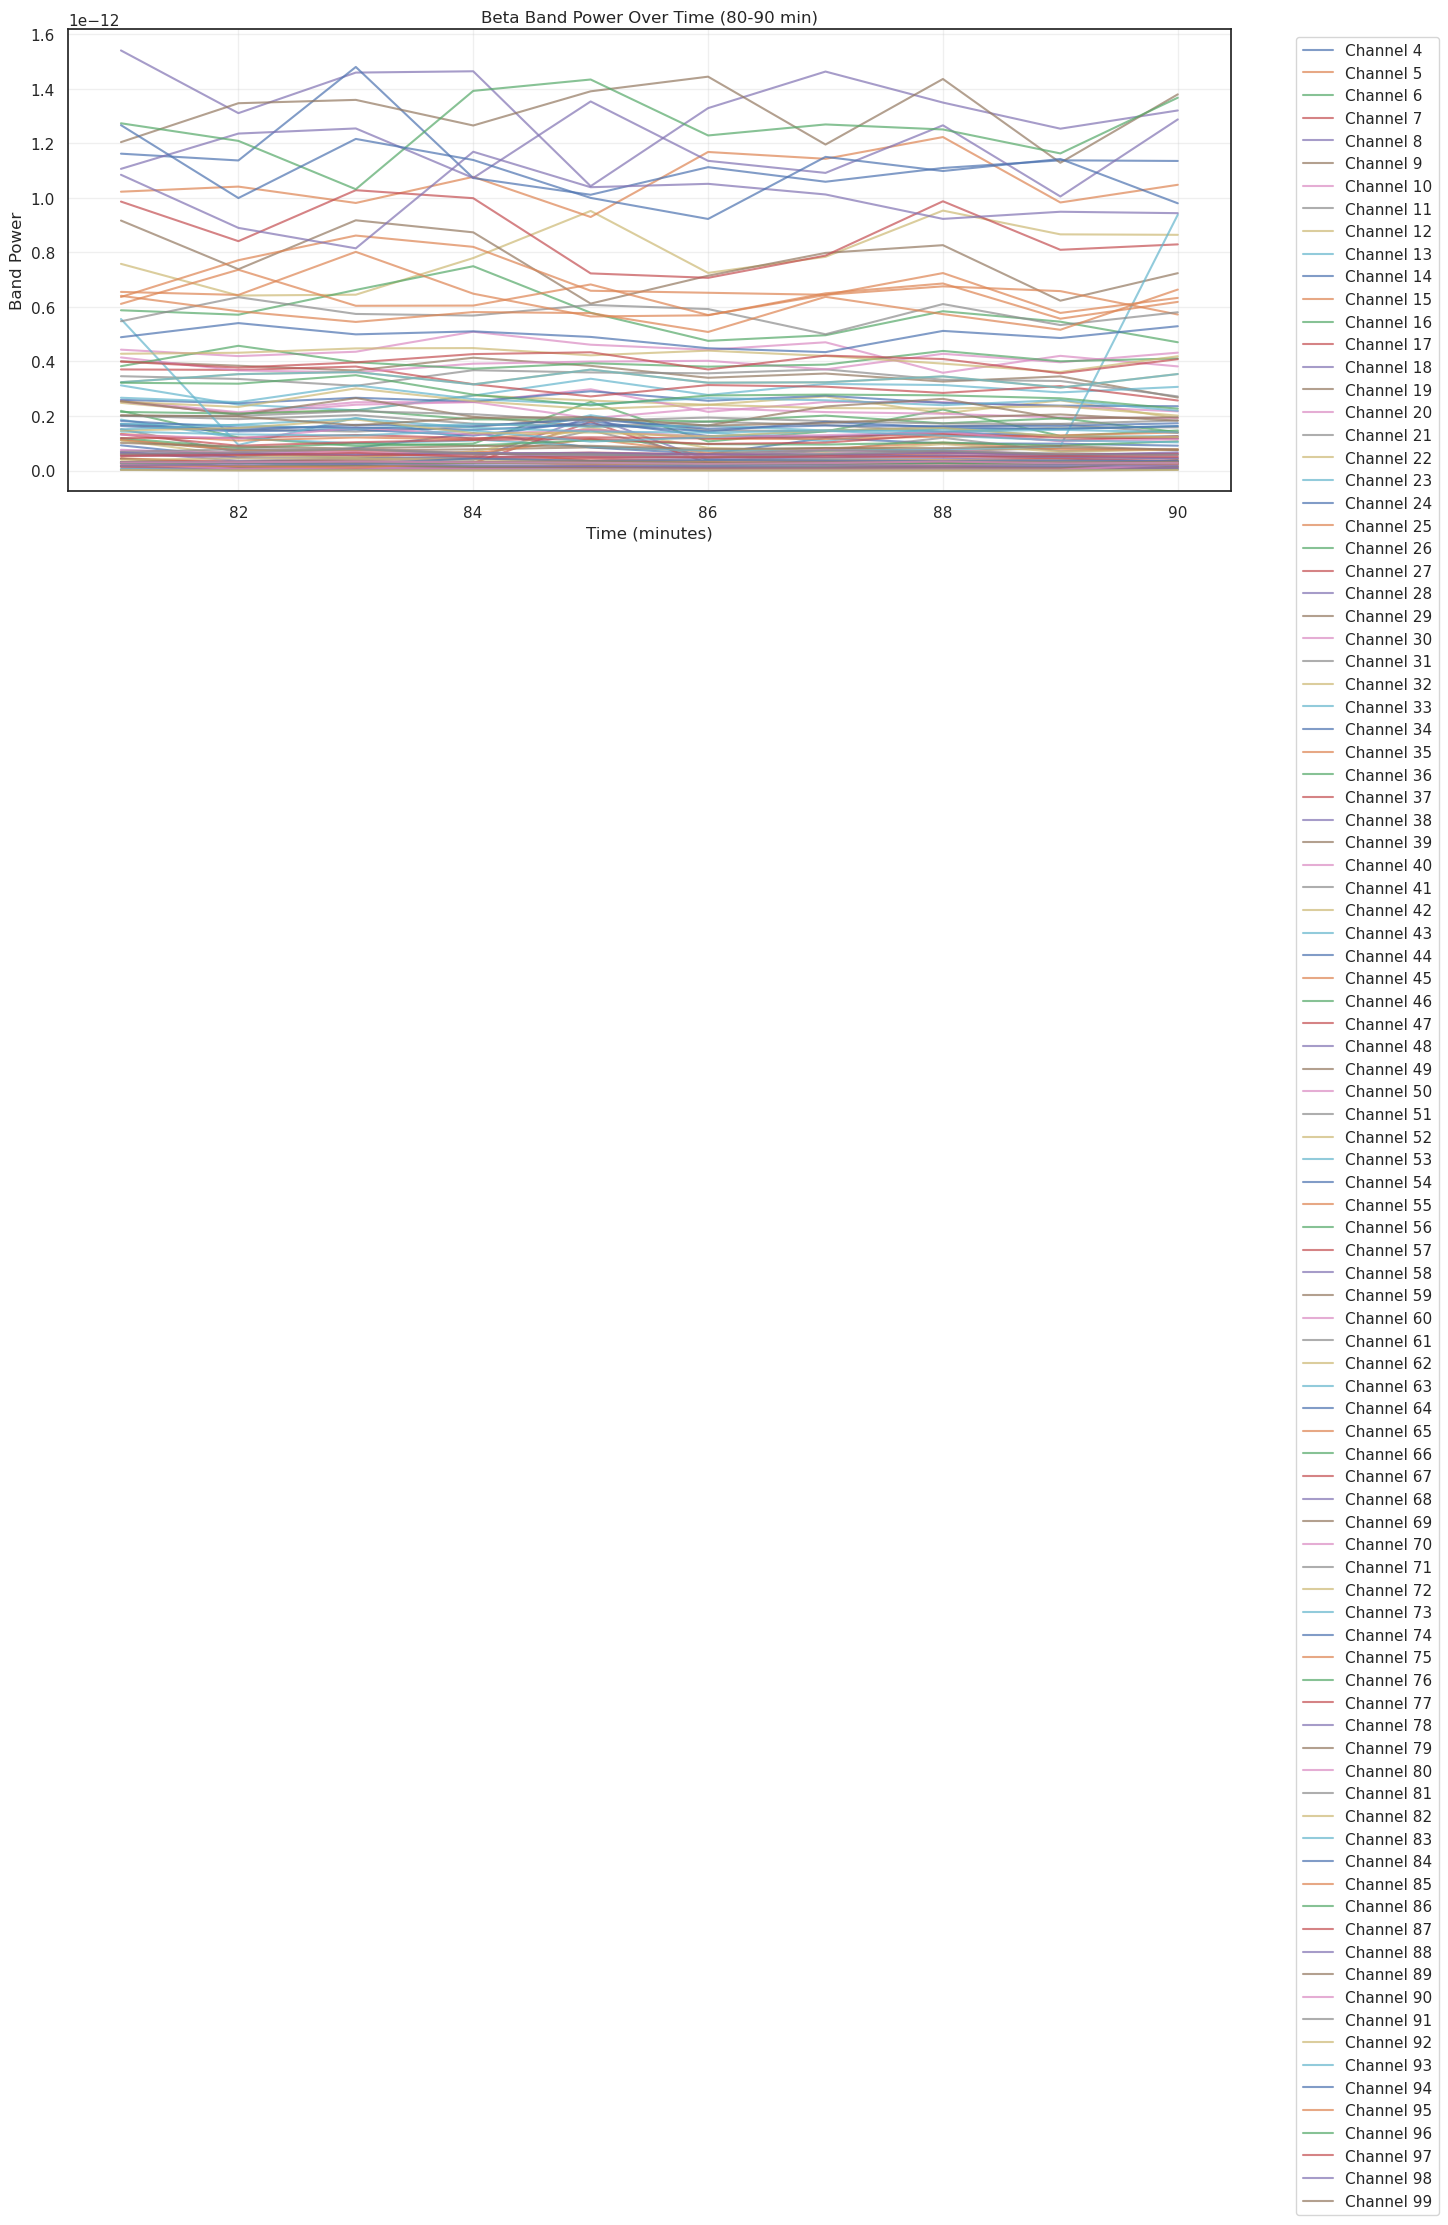

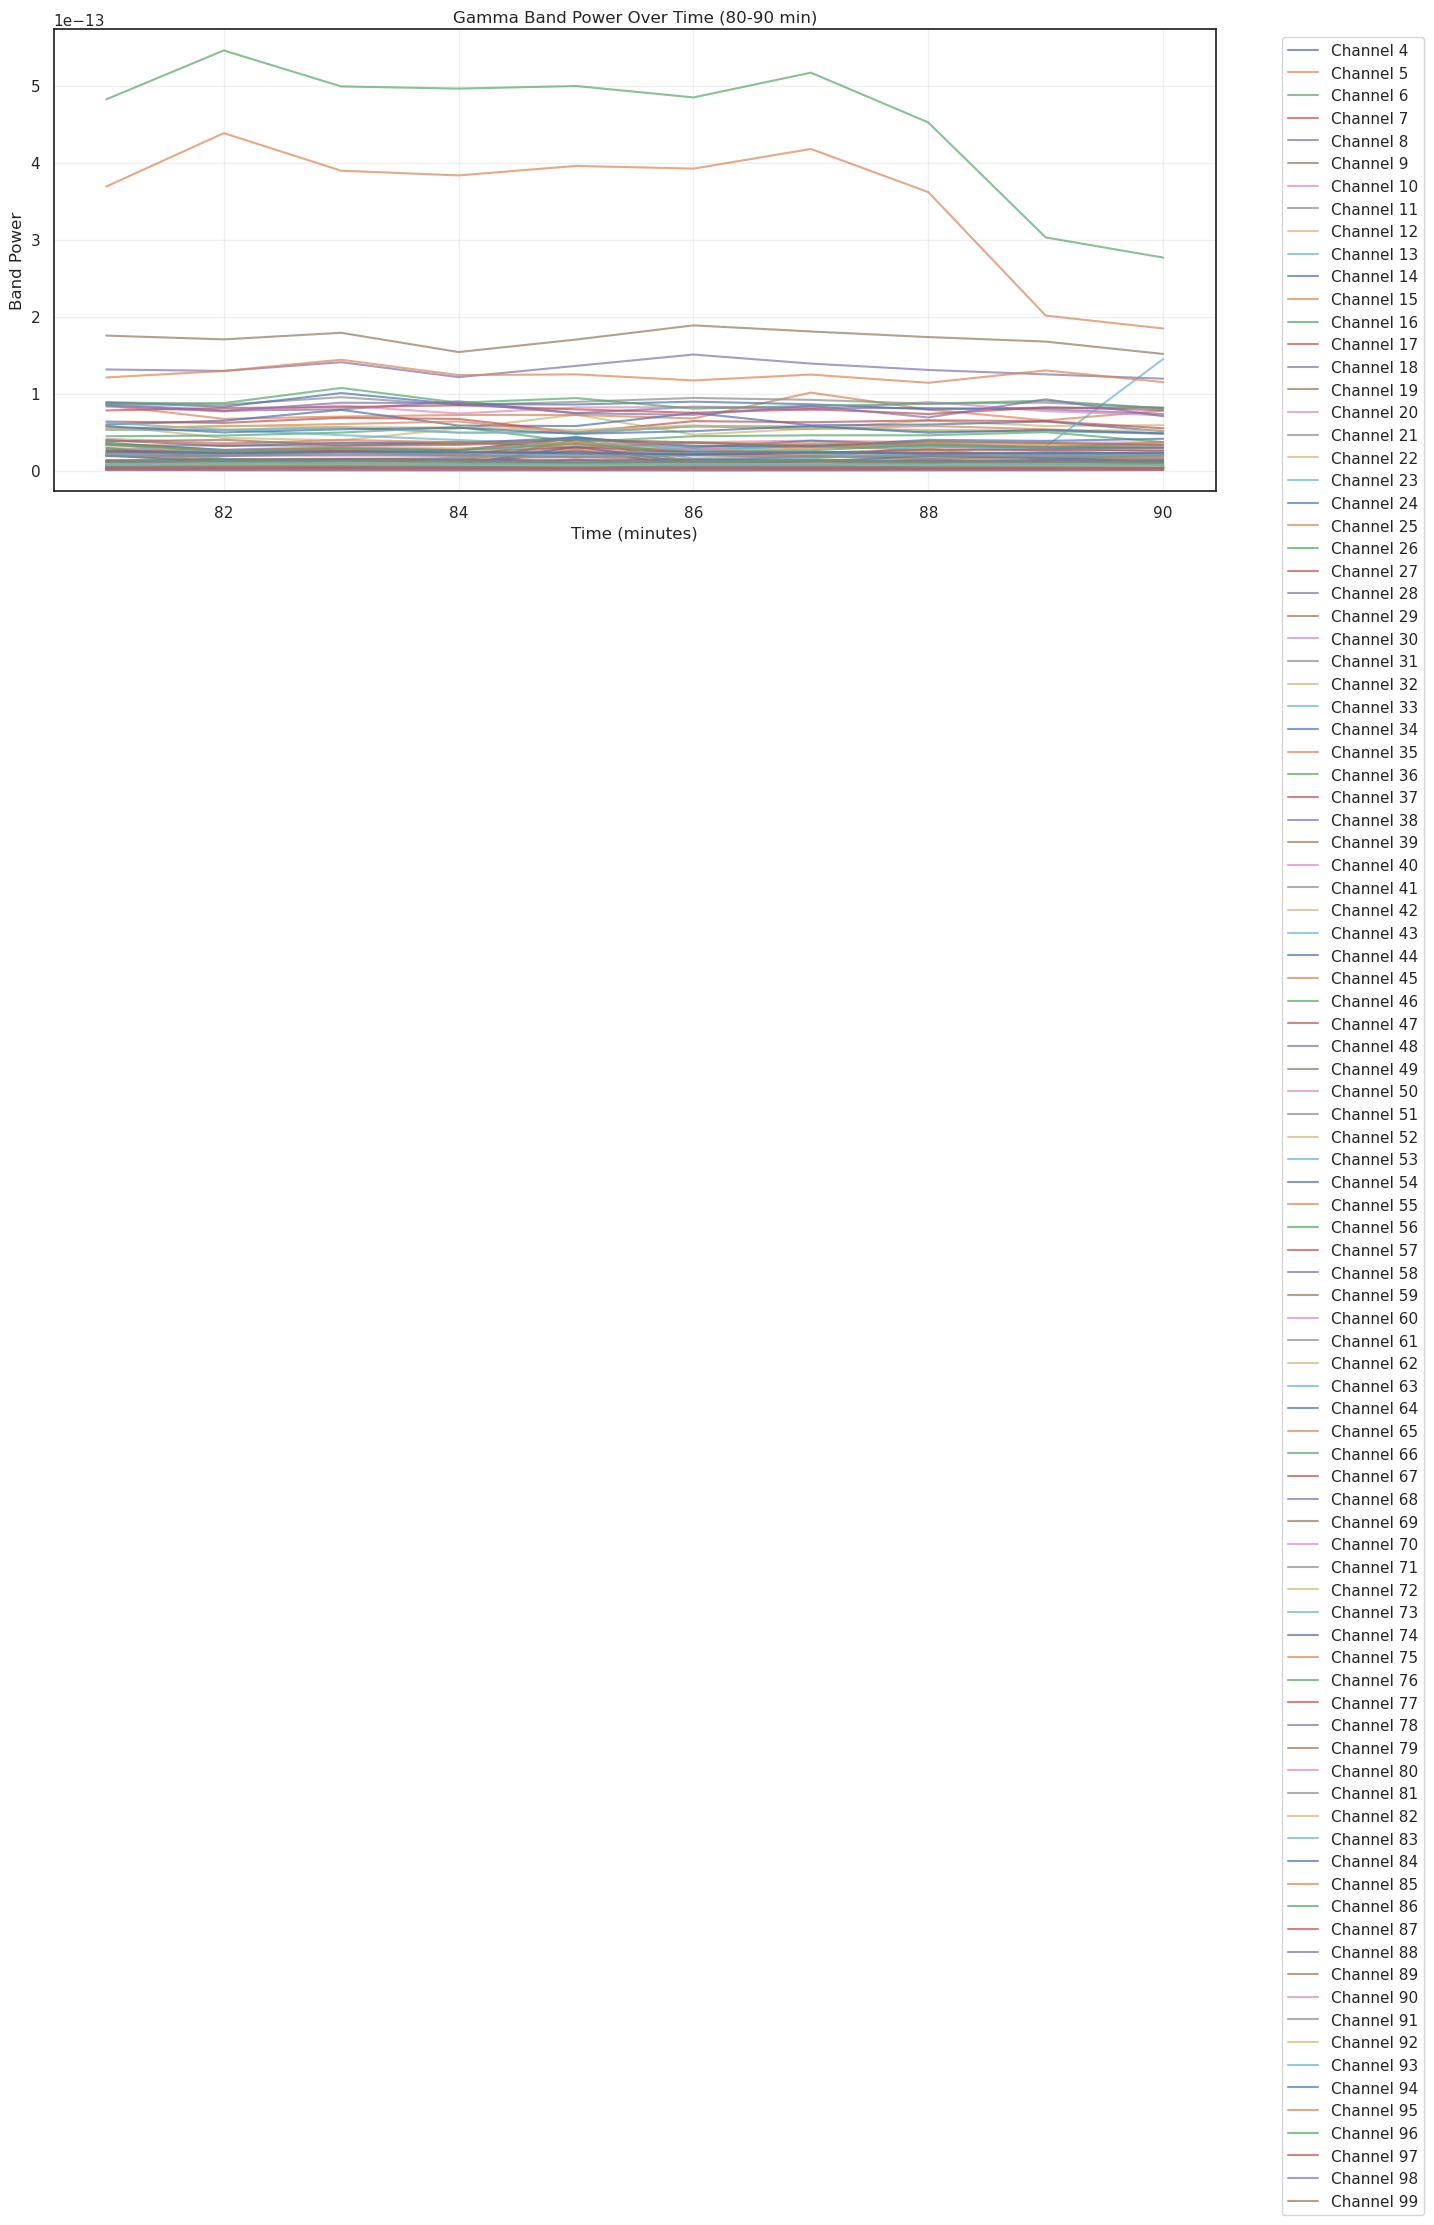

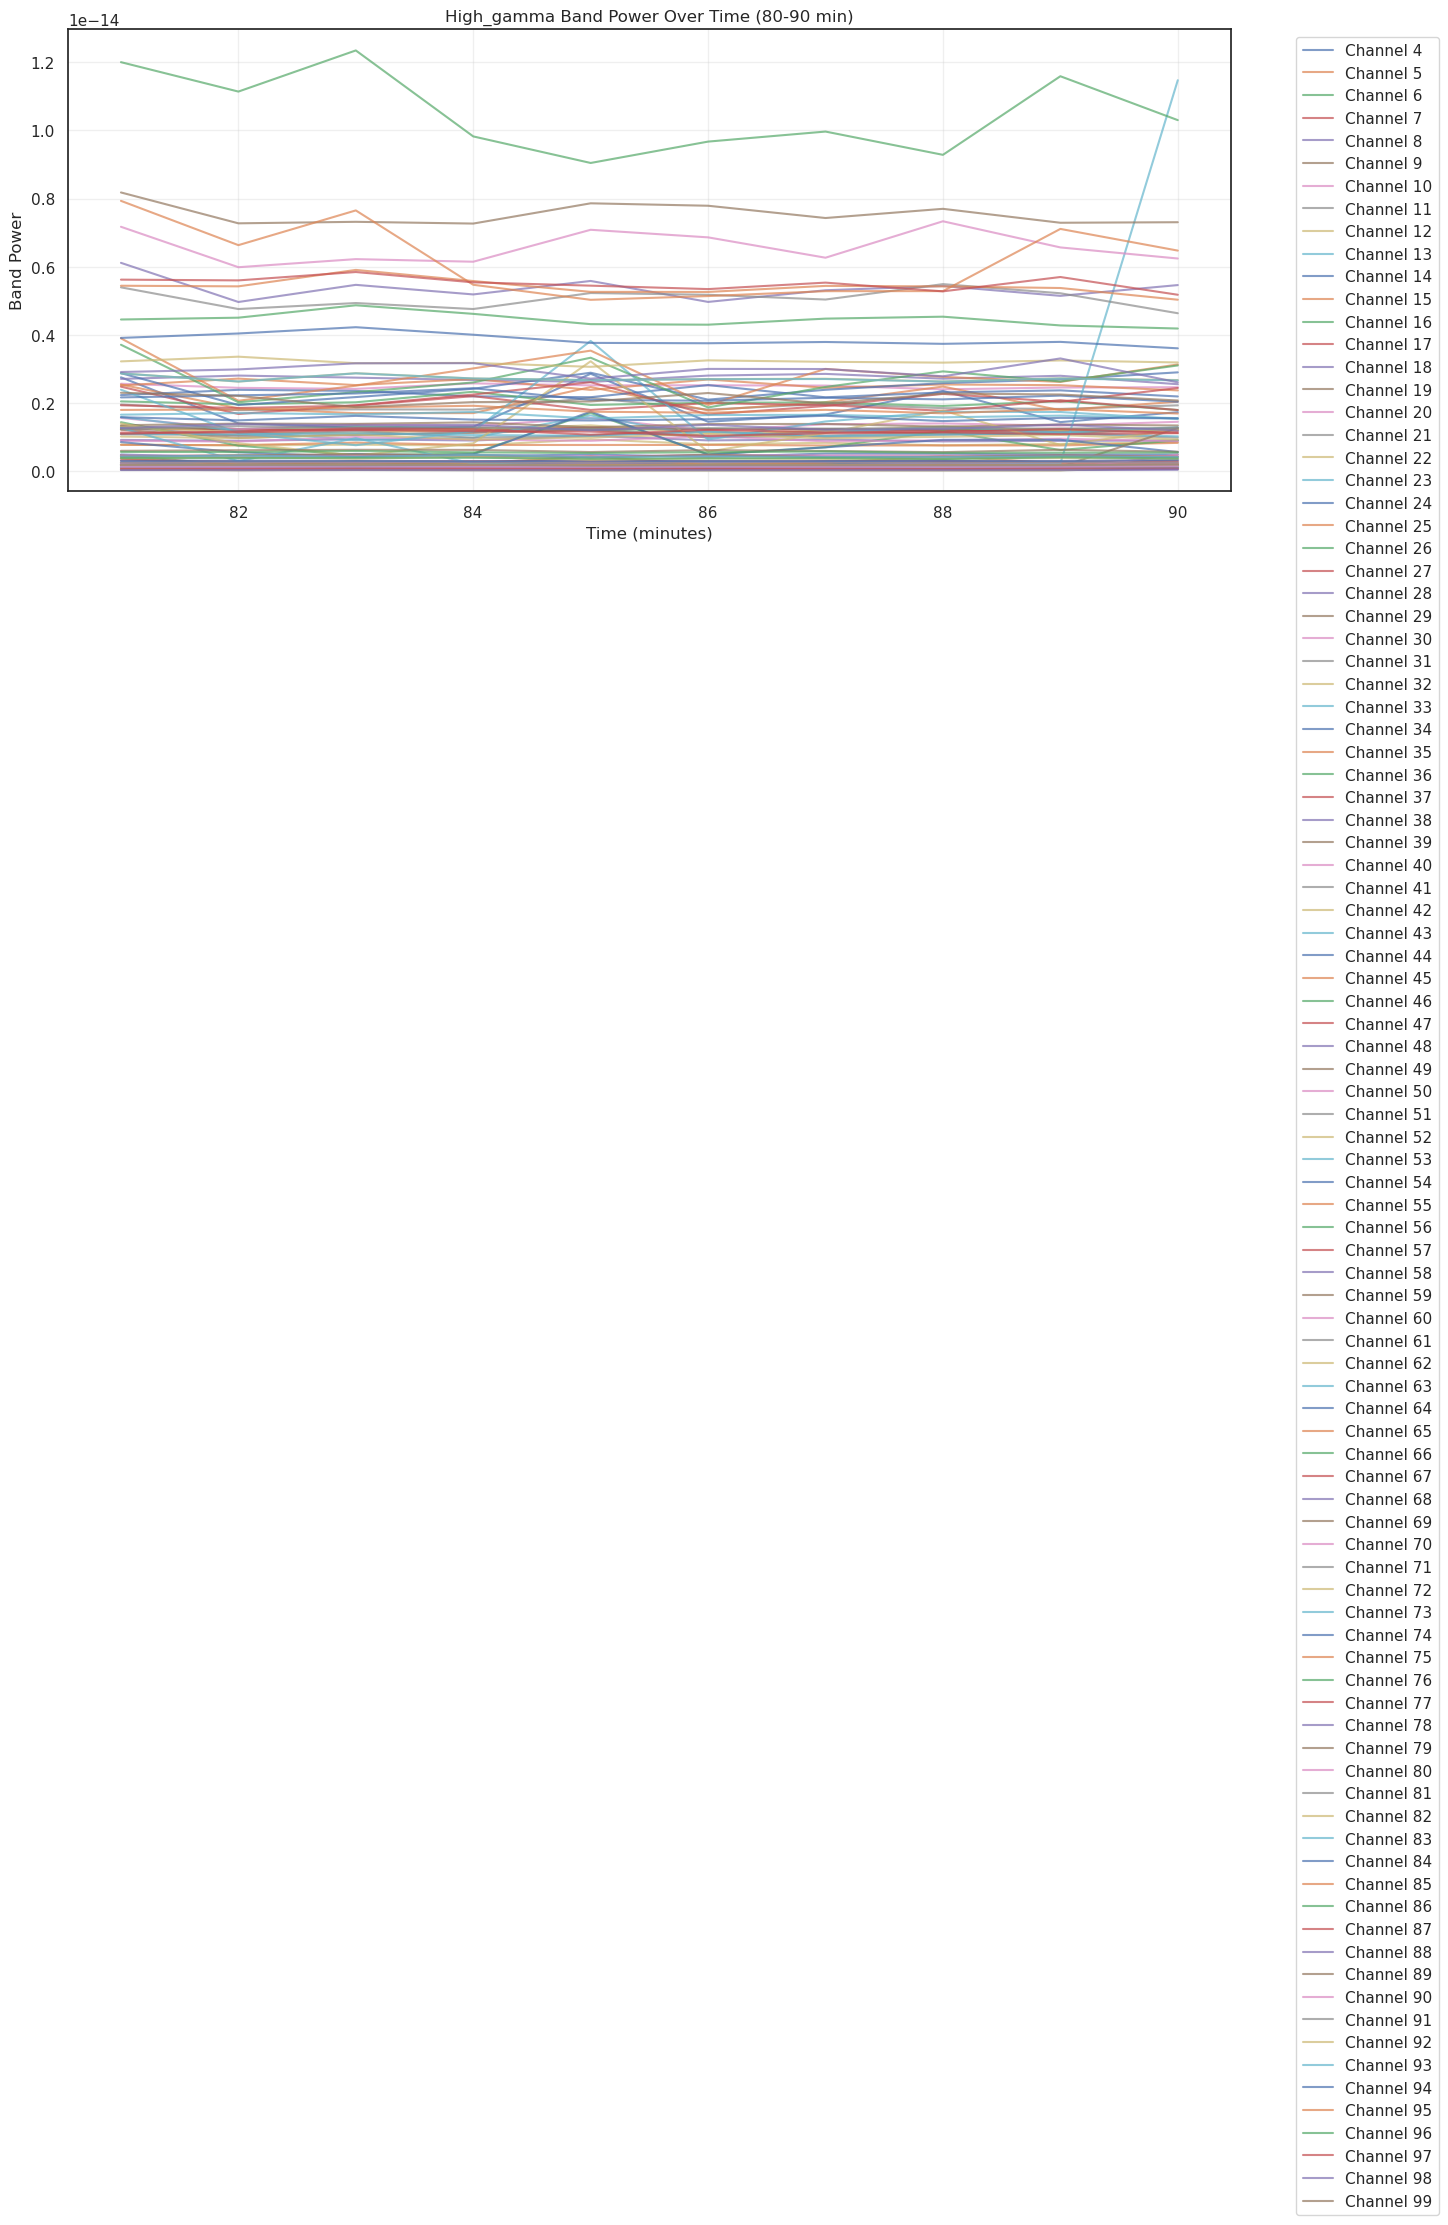

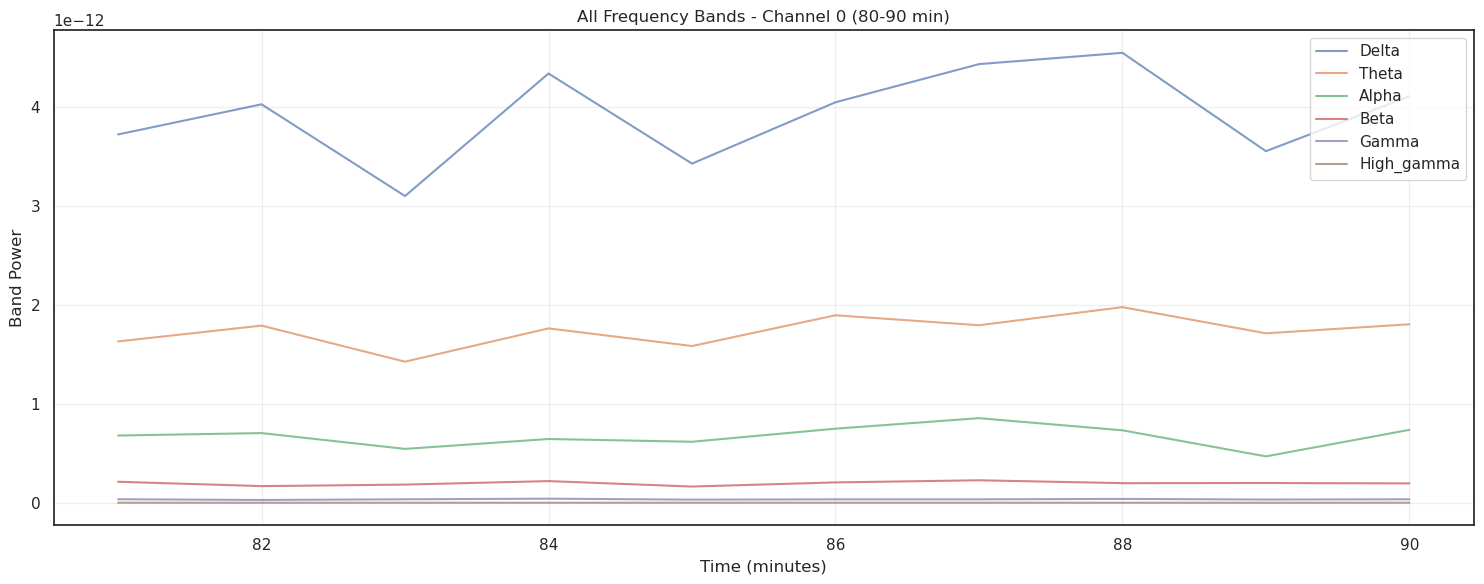

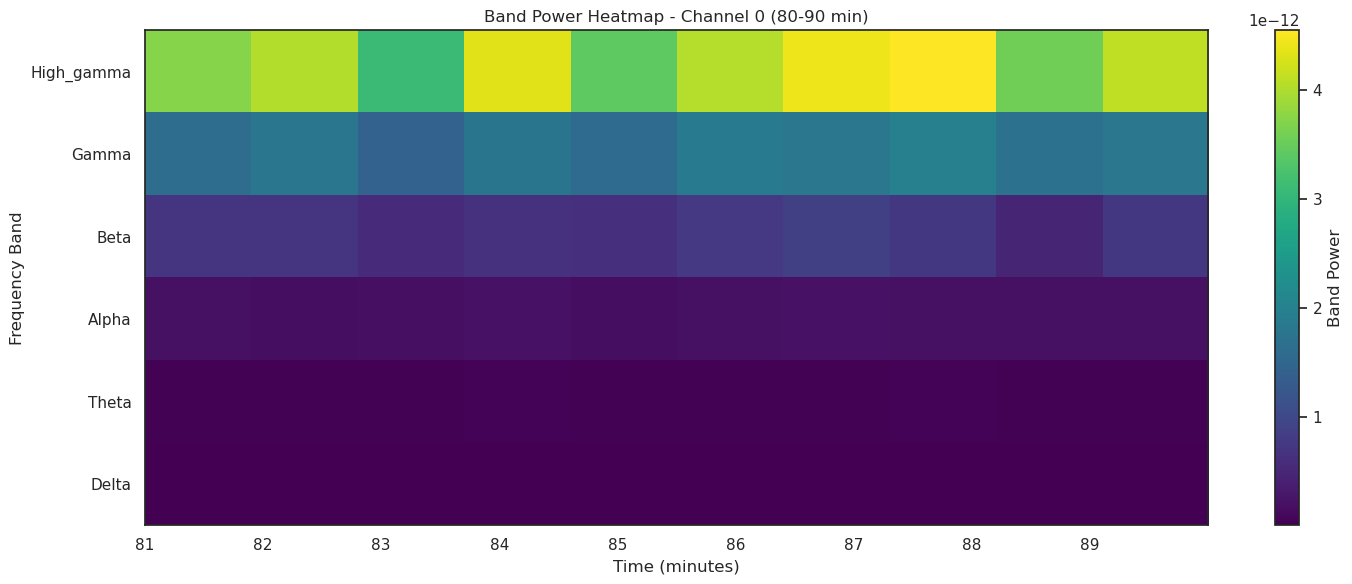

In [75]:
# %%
# ============================================================================
# PLOTTING PARAMETERS - Change these to customize your plots
# ============================================================================

# Time window to visualize (in minutes)
# Set to None to use all data, or specify [start_min, end_min]
time_range_minutes = [80,90]  # Example: [10, 20] for minutes 10-20

# Channels to plot in multi-channel plots
channels_to_plot = list(range(4, 100))

# Channel to use for single-channel plots (Plot 2 and Plot 3)
single_channel = 0

# Frequency bands to include
band_names = ['delta', 'theta', 'alpha', 'beta', 'gamma', 'high_gamma']

# Figure size for plots
figure_size = (15, 6)

# Plot transparency (alpha)
plot_alpha = 0.7

# ============================================================================
# END OF PARAMETERS
# ============================================================================

# Load band power data
band_power_series = nwb.processing['ecephys']["band_power"]
band_power_data = band_power_series.data[:]

# Check if timestamps exist, otherwise use starting_time and rate
if band_power_series.timestamps is not None:
    band_power_timestamps = band_power_series.timestamps[:]
else:
    # Reconstruct timestamps from starting_time and rate
    starting_time = band_power_series.starting_time
    rate = band_power_series.rate
    n_timepoints = band_power_data.shape[0]
    band_power_timestamps = starting_time + np.arange(n_timepoints) / rate
    print(f"Reconstructed timestamps from starting_time={starting_time} and rate={rate} Hz")

# Convert to minutes for time range selection
time_minutes_full = band_power_timestamps / 60

# Apply time range filter if specified
if time_range_minutes is not None:
    start_min, end_min = time_range_minutes
    # Find indices corresponding to the time range
    time_mask = (time_minutes_full >= start_min) & (time_minutes_full <= end_min)
    band_power_data = band_power_data[time_mask, :, :]
    band_power_timestamps = band_power_timestamps[time_mask]
    print(f"\nFiltering to time range: {start_min} - {end_min} minutes")
    time_label = f" ({start_min}-{end_min} min)"
else:
    print("\nUsing full time range")
    time_label = ""

print(f"Band power shape: {band_power_data.shape}")
print(f"  Timepoints: {band_power_data.shape[0]}")
print(f"  Channels: {band_power_data.shape[1]}")
print(f"  Frequency bands: {band_power_data.shape[2]}")
print(f"\nTime range: {band_power_timestamps[0]:.2f} to {band_power_timestamps[-1]:.2f} seconds")
print(f"             ({band_power_timestamps[0]/60:.2f} to {band_power_timestamps[-1]/60:.2f} minutes)")

# Convert to minutes for plotting
time_minutes = band_power_timestamps / 60

# %%
# Plot 1: Each frequency band showing multiple channels
for band_idx, band_name in enumerate(band_names):
    plt.figure(figsize=figure_size)
    for ch_idx in channels_to_plot:
        channel_band_data = band_power_data[:, ch_idx, band_idx]
        plt.plot(time_minutes, channel_band_data, label=f'Channel {ch_idx}', alpha=plot_alpha)
    plt.xlabel('Time (minutes)')
    plt.ylabel('Band Power')
    plt.title(f'{band_name.capitalize()} Band Power Over Time{time_label}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# %%
# Plot 2: Single channel showing all frequency bands
plt.figure(figsize=figure_size)
for band_idx, band_name in enumerate(band_names):
    channel_band_data = band_power_data[:, single_channel, band_idx]
    plt.plot(time_minutes, channel_band_data, label=band_name.capitalize(), alpha=plot_alpha)
plt.xlabel('Time (minutes)')
plt.ylabel('Band Power')
plt.title(f'All Frequency Bands - Channel {single_channel}{time_label}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# %%
# Plot 3: Heatmap for a single channel (all bands over time)
plt.figure(figsize=figure_size)
plt.imshow(band_power_data[:, single_channel, :].T, aspect='auto', cmap='viridis', 
           extent=[time_minutes[0], time_minutes[-1], 0, len(band_names)])
plt.colorbar(label='Band Power')
plt.yticks(np.arange(len(band_names)) + 0.5, [b.capitalize() for b in band_names])
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency Band')
plt.title(f'Band Power Heatmap - Channel {single_channel}{time_label}')
plt.tight_layout()
plt.show()

